# Problem Statement:

**Data Set Information:**

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


**Attribute Information:**

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("temperature.csv")
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [6]:
df.shape

(7752, 25)

Dataset has 7752 rows and 25 columns.

In [7]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

There are no identifier or constant columns. Looking at date it looks like we have data for 320 days.

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are several null values in the dataset.

In [9]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All the datatypes are in float except for the date column.

In [10]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

There is skewness present in many continuous columns.

In [11]:
#Setting option to see all the columns.
pd.set_option('display.max_columns', None)

In [12]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.128010     2.487613  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000

Count is different in different row indicating missing values. Mean is not equal to median, data does not follow normal distribution. There is high variance in solar radiation column while some columns such as lon and lat have variance close to zero. Difference between minimum, maximum and interquartile range is m=not equal which indicates presence of outliers.

# EDA

## Univariate Analysis

In [13]:
#Separating categorical and continuous variables with respect to uniqueness of columns
cont=[i for i in df.columns if df[i].nunique()>30 and i!='Date']
cat=[i for i in df.columns if df[i].nunique()<30]

0.697000    310
0.266100    310
0.623300    310
2.785000    310
0.572100    310
0.098500    310
0.412500    310
2.686500    310
0.222300    310
0.155400    310
0.514100    310
5.178200    310
2.534800    310
0.855200    310
2.257900    310
0.133200    310
1.231300    310
1.562900    310
0.593100    310
0.505500    310
0.271300    310
0.145700    310
0.618000    310
1.767800    310
4.729600    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

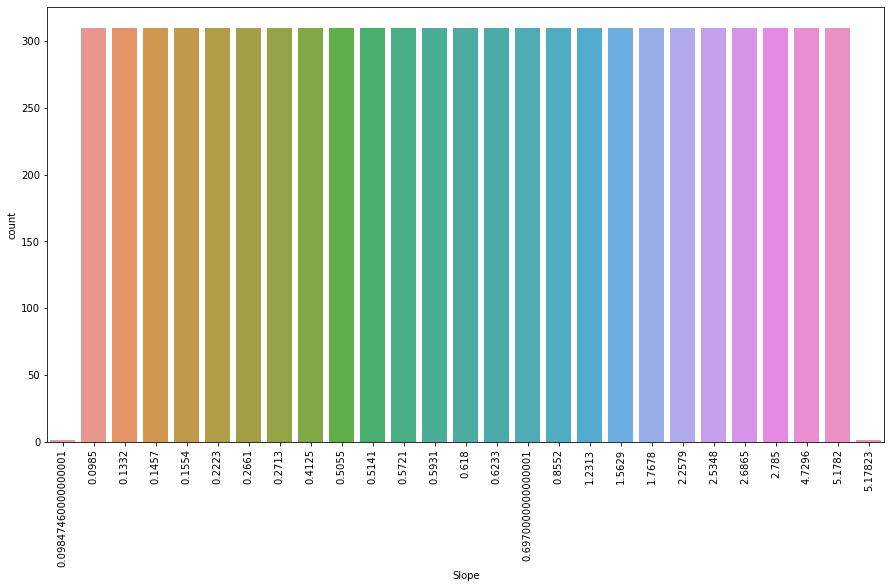

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=df)
plt.xticks(rotation=90)
df['Slope'].value_counts()

All the slope values have equal no. of counts except for 2 slopes which have only one count each. These values seem to belong to their rounded of categories respectively.

12.3700     311
212.3350    311
146.5540    310
82.2912     310
54.6384     310
35.0380     310
17.2956     310
52.5180     310
75.0924     310
15.5876     310
132.1180    310
56.4448     310
21.9668     310
26.2980     310
28.7000     310
33.3068     310
59.8324     310
53.4712     310
50.9312     310
208.5070    310
19.5844     310
30.9680     310
44.7624     310
30.0464     310
45.7160     310
Name: DEM, dtype: int64

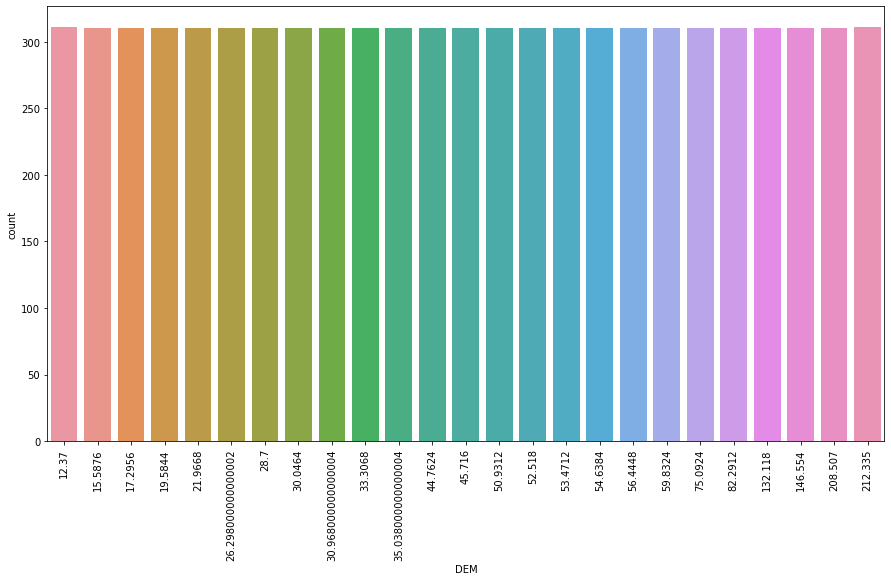

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=df)
plt.xticks(rotation=90)
df['DEM'].value_counts()

All the elevations have same count equal to 310 except two who have 311 counts each.

127.135    311
126.826    311
126.995    310
126.937    310
126.991    310
126.988    310
127.024    310
127.086    310
127.022    310
126.970    310
126.838    310
127.042    310
127.058    310
127.040    310
126.891    310
127.032    310
127.099    310
127.083    310
126.938    310
126.909    310
126.910    310
127.004    310
126.927    310
126.955    310
127.085    310
Name: lon, dtype: int64

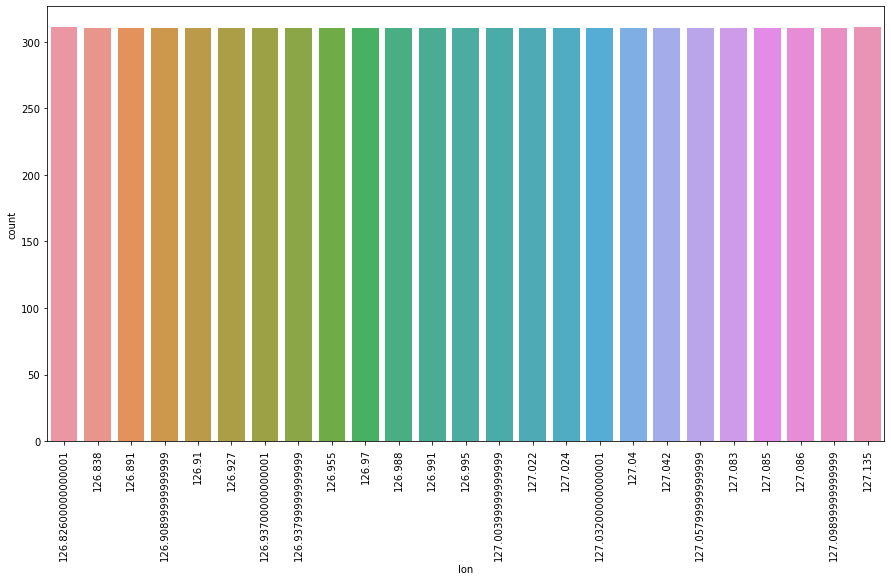

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x='lon',data=df)
plt.xticks(rotation=90)
df['lon'].value_counts()

All the longitude have smae count equal to 310 except two longitudes that have 311 counts each.

37.5776    1240
37.5507    1240
37.5237     620
37.4697     620
37.5102     620
37.6181     620
37.4967     620
37.6046     620
37.5372     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

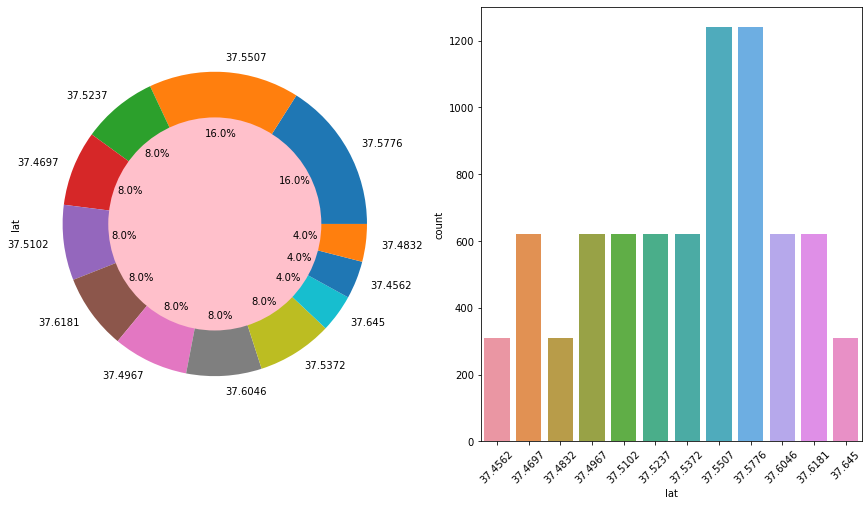

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['lat'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='pink')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='lat',data=df)
plt.xticks(rotation=45)
df['lat'].value_counts()

There are 12 latitudes present, two of which have the highest count equal to 1240 while 7 of them have 620 counts and rest 3 have less than 350 counts.

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

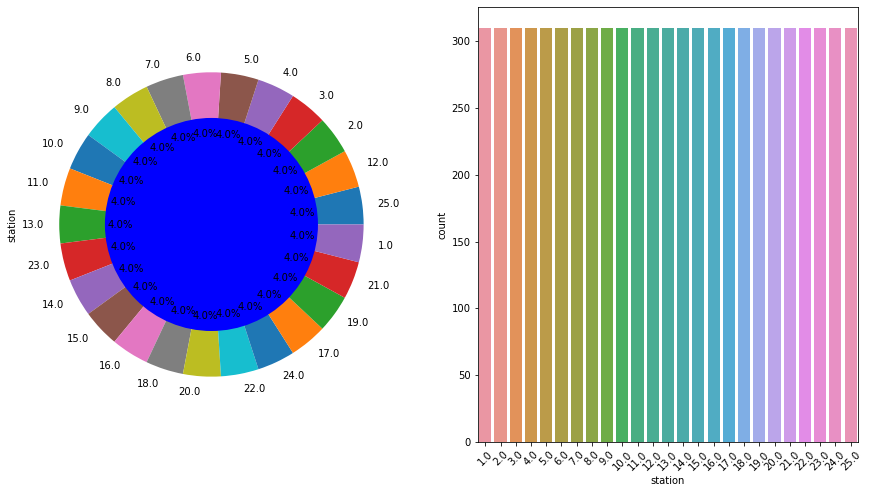

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['station'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='blue')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='station',data=df)
plt.xticks(rotation=45)
df['station'].value_counts()

There are 25 stations each of them have 310 observations.

Minimum Tmax is 20.0 and Maximum Tmax is 37.6
Minimum Tmin is 11.3 and Maximum Tmin is 29.9


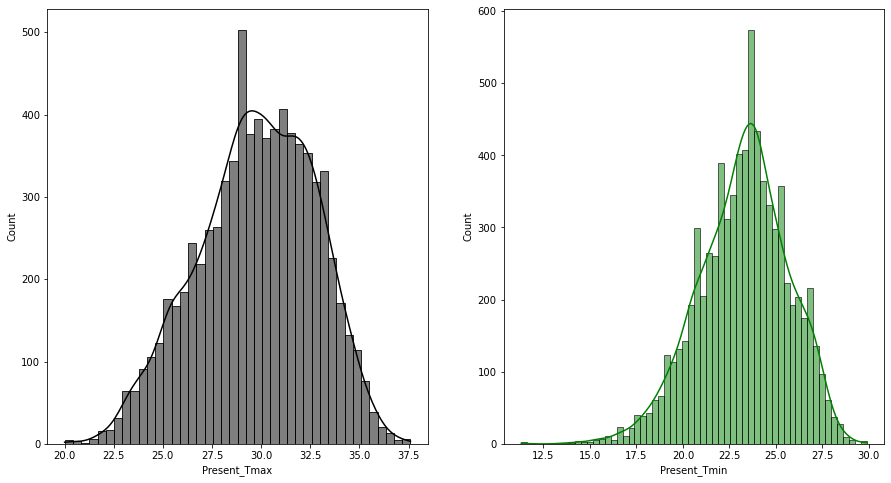

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='k')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='g')
print('Minimum Tmax is {} and Maximum Tmax is {}'.format(df['Present_Tmax'].min(),df['Present_Tmax'].max()))
print('Minimum Tmin is {} and Maximum Tmin is {}'.format(df['Present_Tmin'].min(),df['Present_Tmin'].max()))

Present Tmax and Tmin are almost normally distibuted, Tmax have highest temp as 37.6 and min as 20, most of the days have tmax equal to 28.5, while Tmin have highest temp as 29.9 and min as 11.3, most of the days have tmin equal to 23.

Minimum RHmax is 58.93628311 and Maximum RHmax is 100.00015259999999
Minimum RHmin is 19.79466629 and Maximum RHmin is 98.5247345


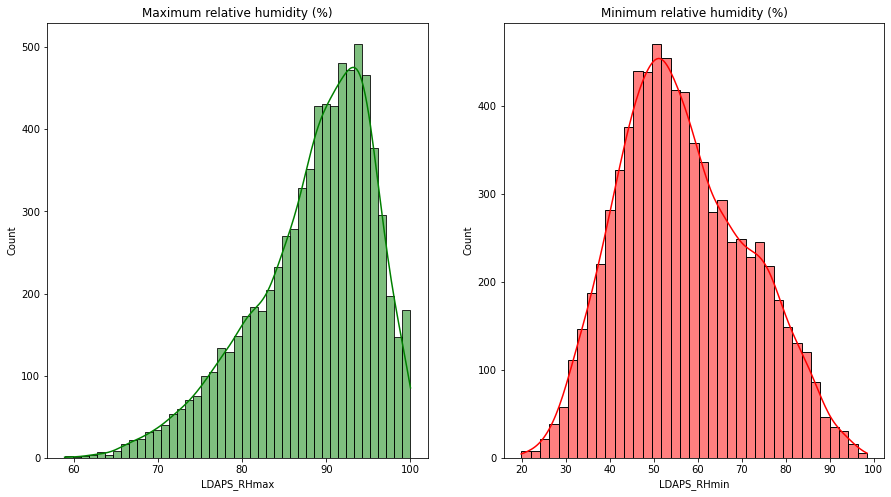

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='g')
plt.title('Maximum relative humidity (%)')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='r')
plt.title('Minimum relative humidity (%)')
print('Minimum RHmax is {} and Maximum RHmax is {}'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} and Maximum RHmin is {}'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

Data of Maximum relative humidity is left skewed and Data of Maximum relative humidity is slightly right skewed. RHmax for most of the days lie in the range 92 to 97 while RHmin lies in the range 45 to 62.

Minimum Tmax applied lapse rate is 17.62495378 and Maximum Tmax applied lapse rate is 38.54225522
Minimum Tmin is applied lapse rate 14.27264631 and Maximum Tmin applied lapse rate is 29.61934244


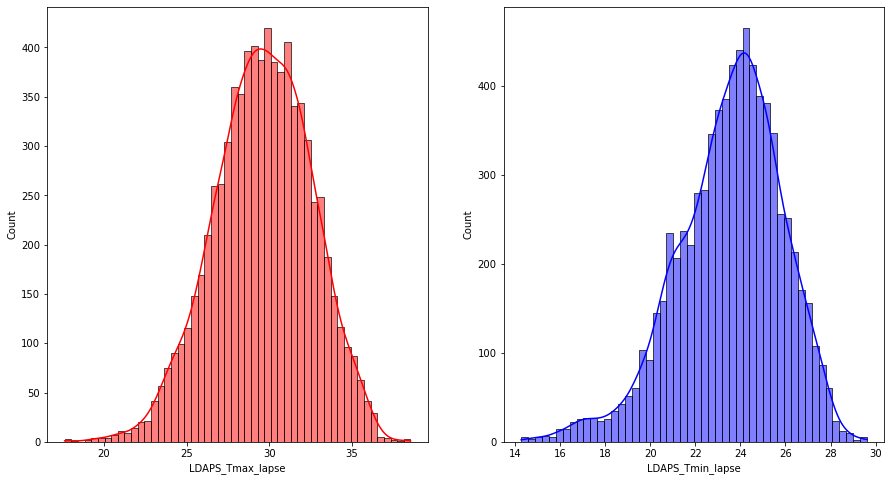

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='b')
print('Minimum Tmax applied lapse rate is {} and Maximum Tmax applied lapse rate is {}'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} and Maximum Tmin applied lapse rate is {}'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))

Tmax and Tmin for applied lapse rate are almost normally distributed, with Tmax_lapse having maximum at 38.54 , minimum at 17.62 and for majority of days its values lies in the range 27 to 32 while Tmin_lapse having maximum at 29.61 , minimum at 14.27 and for majority of days its values lies in the range 23 to 26

Minimum 2.882579625
Maximum 21.85762099


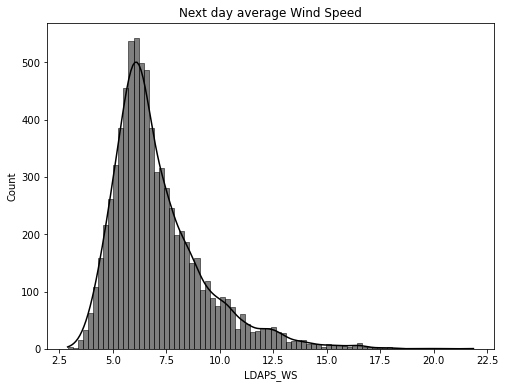

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='k')
plt.title('Next day average Wind Speed')
print('Minimum',df['LDAPS_WS'].min())
print('Maximum',df['LDAPS_WS'].max())

Data of average wind speed ris right skewed. It have its minimum value at 2.88m/s and maximum values at 21.85m/s and majority of its values lies in the rabge 5m/s to 8m/s

Minimum -13.60321209
Maximum 213.4140062


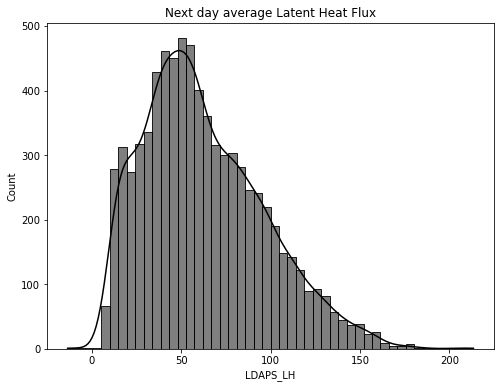

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_LH'],kde=True,color='k')
plt.title('Next day average Latent Heat Flux')
print('Minimum',df['LDAPS_LH'].min())
print('Maximum',df['LDAPS_LH'].max())

Latent heat flux seems to be normally distributed with slight skewness to the right. It has its minimum value at -13.60 and maximum values at 213.41 and majority of its values lies in the range 30 to 70.

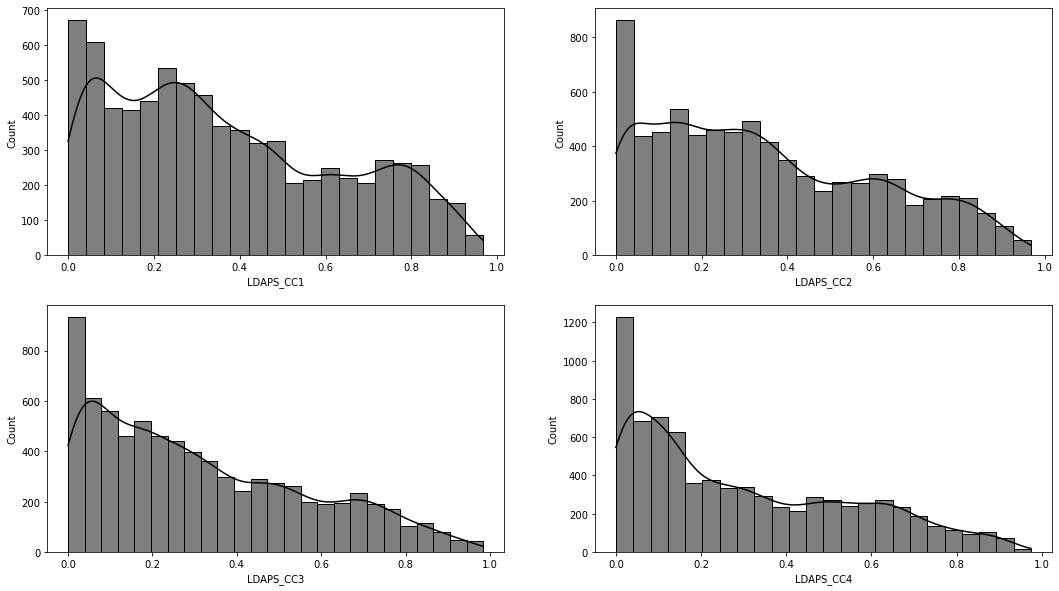

In [27]:
cloud_cover=['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']

fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0

for i, n in enumerate(cloud_cover):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.histplot(df[n],kde=True,color='k',ax=ax[r,c])
    c+=1


Cloud cover data for all the 6 hour split is right skewed and majority of all the splits values lie close to 0.

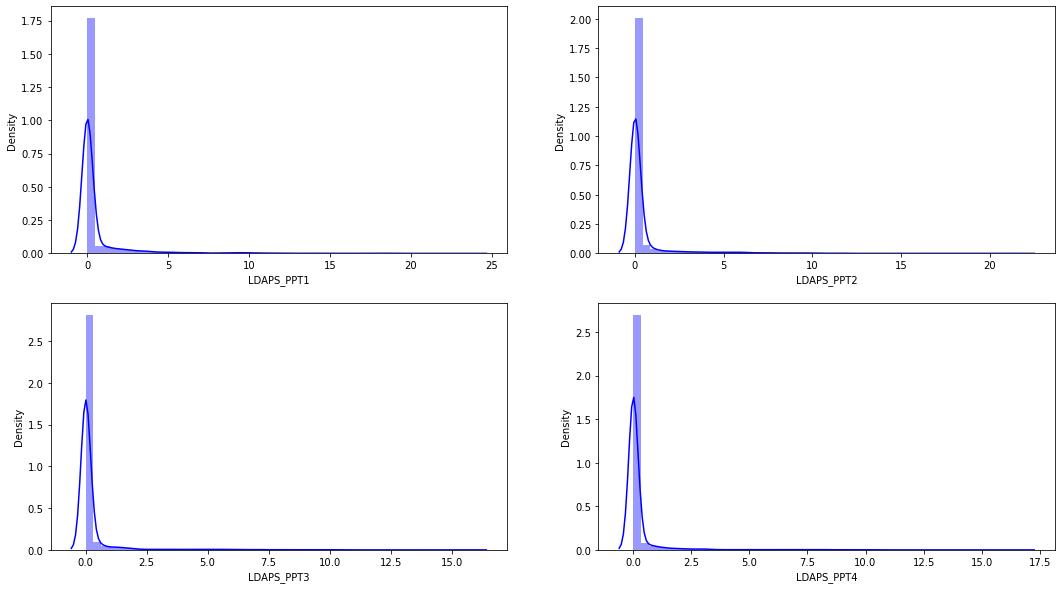

In [28]:
precipitation=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']

fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0

for i, n in enumerate(precipitation):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],color='b',ax=ax[r,c])
    c+=1

Precipitation data for all the 6 hour split is right skewed and majority of all the splits values lie close to 0.

Minimum 4329.520508
Maximum 5992.895996


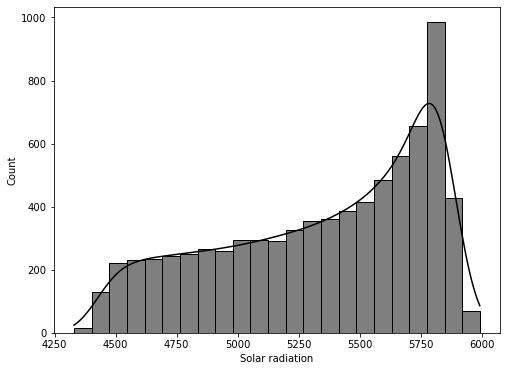

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='k')
print('Minimum',df['Solar radiation'].min())
print('Maximum',df['Solar radiation'].max())

Incoming Solar Radiation left skewed. It has its minimum value at 4329.52 and maximum values at 5992.89 and majority of its values lies in the range 5600 to 5850.

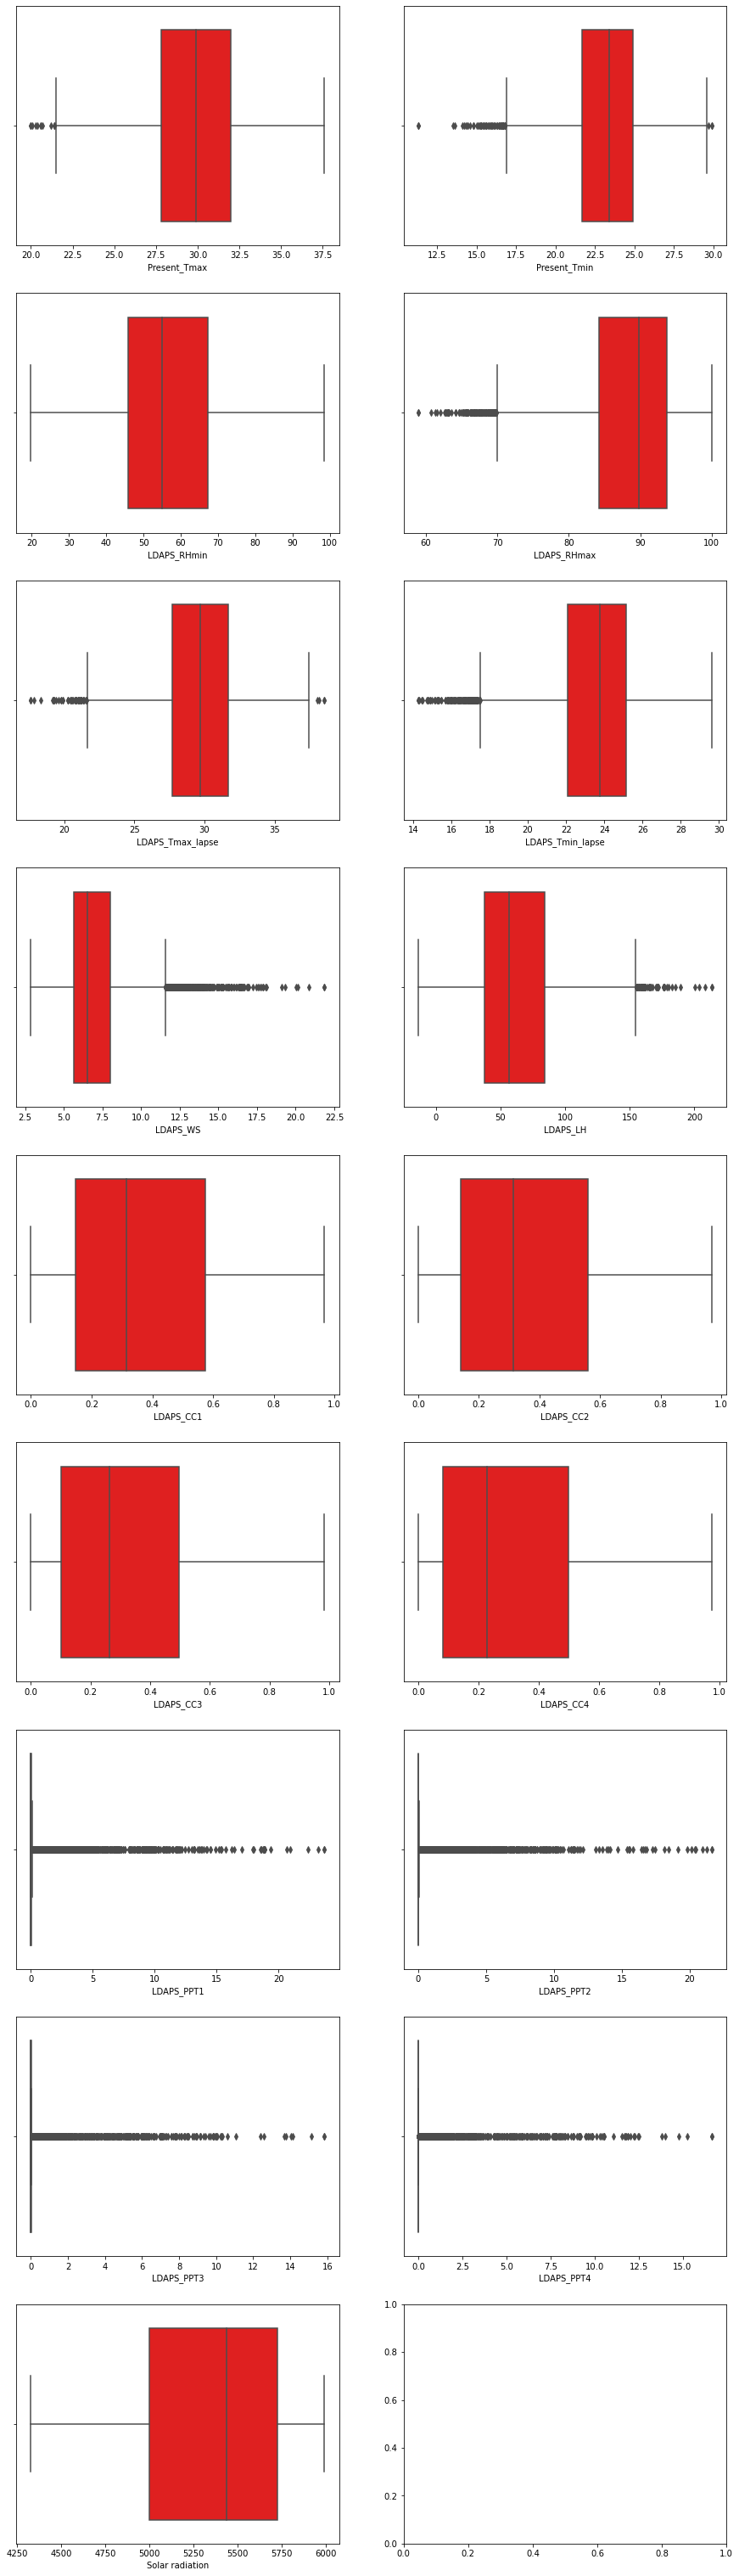

In [30]:
fig,ax=plt.subplots(9,2,figsize=(15,55))
r=0
c=0

for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],color='r',ax=ax[r,c])
    c+=1

There a large no. of outliers especially in the precipitation data. Latent heat flux, wind speed, temperature applied lapse rate and Rhmax also have presence of outliers. While there are few in present day tmax and tmin also.

## Bivariate Analysis

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

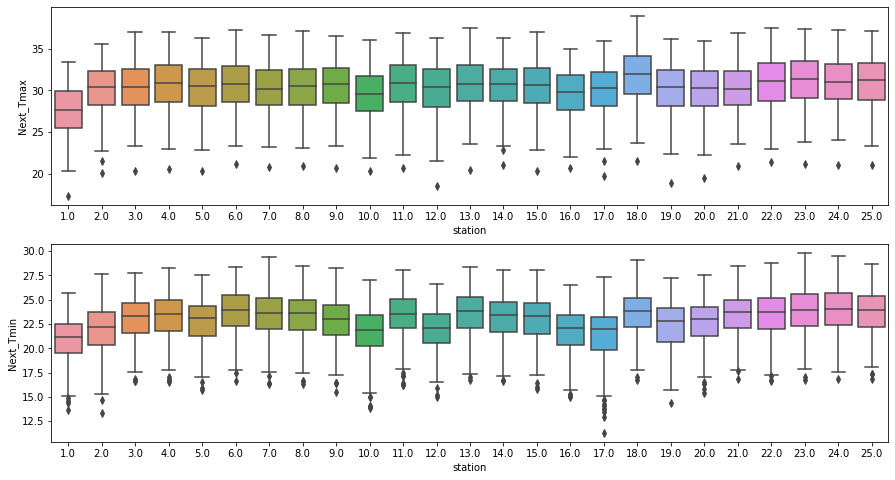

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=df)
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=df)

Station 18 observes highest temperature for both Tmax and Tmin while station 1 observes lowest temperatures for both. It coud be because of their location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '37.4562'),
  Text(1, 0, '37.4697'),
  Text(2, 0, '37.4832'),
  Text(3, 0, '37.4967'),
  Text(4, 0, '37.5102'),
  Text(5, 0, '37.5237'),
  Text(6, 0, '37.5372'),
  Text(7, 0, '37.5507'),
  Text(8, 0, '37.5776'),
  Text(9, 0, '37.6046'),
  Text(10, 0, '37.6181'),
  Text(11, 0, '37.645')])

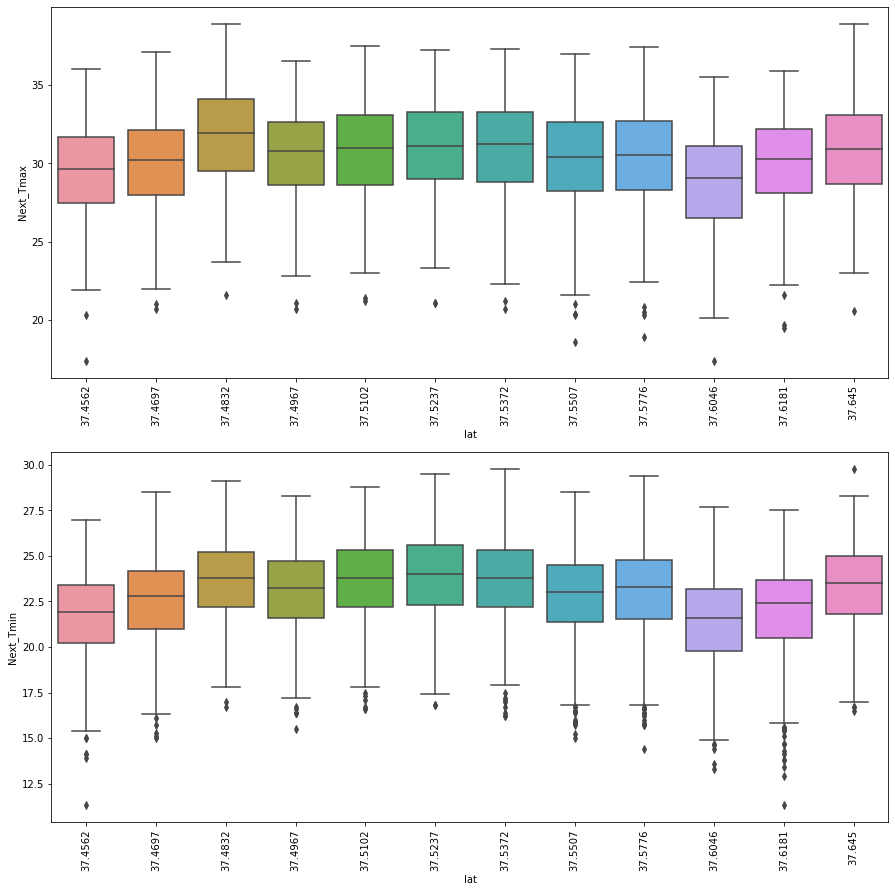

In [33]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

Temperature seems to fall as the the latitude increases which is also a know fact. Highest temperature is observed at 37.645 for Tmax while this is not the case for tmin which could be because of the other factors that affect the temperature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.82600000000001'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.90899999999999'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.93700000000001'),
  Text(7, 0, '126.93799999999999'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.00399999999999'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.03200000000001'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.05799999999999'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.09899999999999'),
  Text(24, 0, '127.135')])

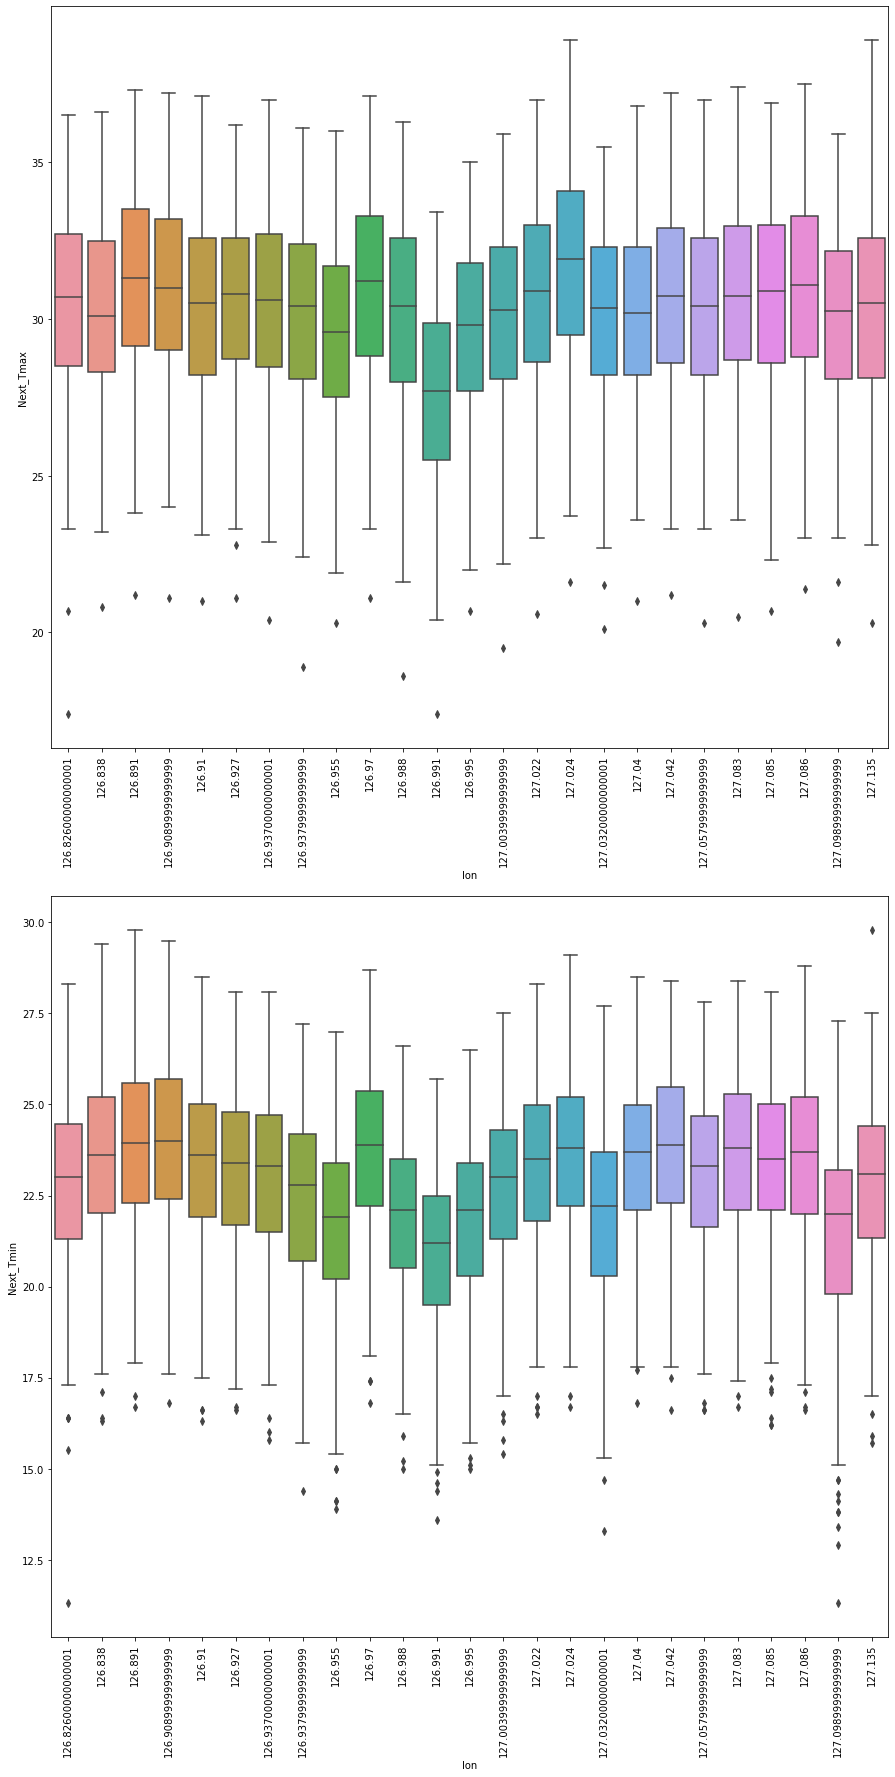

In [34]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

Studies have shown that longitude does not affect the temperature of a place. While from the above graph it is seen that as the longitude increases, temperature increases for the first 4 longitudes then decreases for the next 5. This increase decrease is carried on.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '12.37'),
  Text(1, 0, '15.5876'),
  Text(2, 0, '17.2956'),
  Text(3, 0, '19.5844'),
  Text(4, 0, '21.9668'),
  Text(5, 0, '26.298000000000002'),
  Text(6, 0, '28.7'),
  Text(7, 0, '30.0464'),
  Text(8, 0, '30.968000000000004'),
  Text(9, 0, '33.3068'),
  Text(10, 0, '35.038000000000004'),
  Text(11, 0, '44.7624'),
  Text(12, 0, '45.716'),
  Text(13, 0, '50.9312'),
  Text(14, 0, '52.518'),
  Text(15, 0, '53.4712'),
  Text(16, 0, '54.6384'),
  Text(17, 0, '56.4448'),
  Text(18, 0, '59.8324'),
  Text(19, 0, '75.0924'),
  Text(20, 0, '82.2912'),
  Text(21, 0, '132.118'),
  Text(22, 0, '146.554'),
  Text(23, 0, '208.507'),
  Text(24, 0, '212.335')])

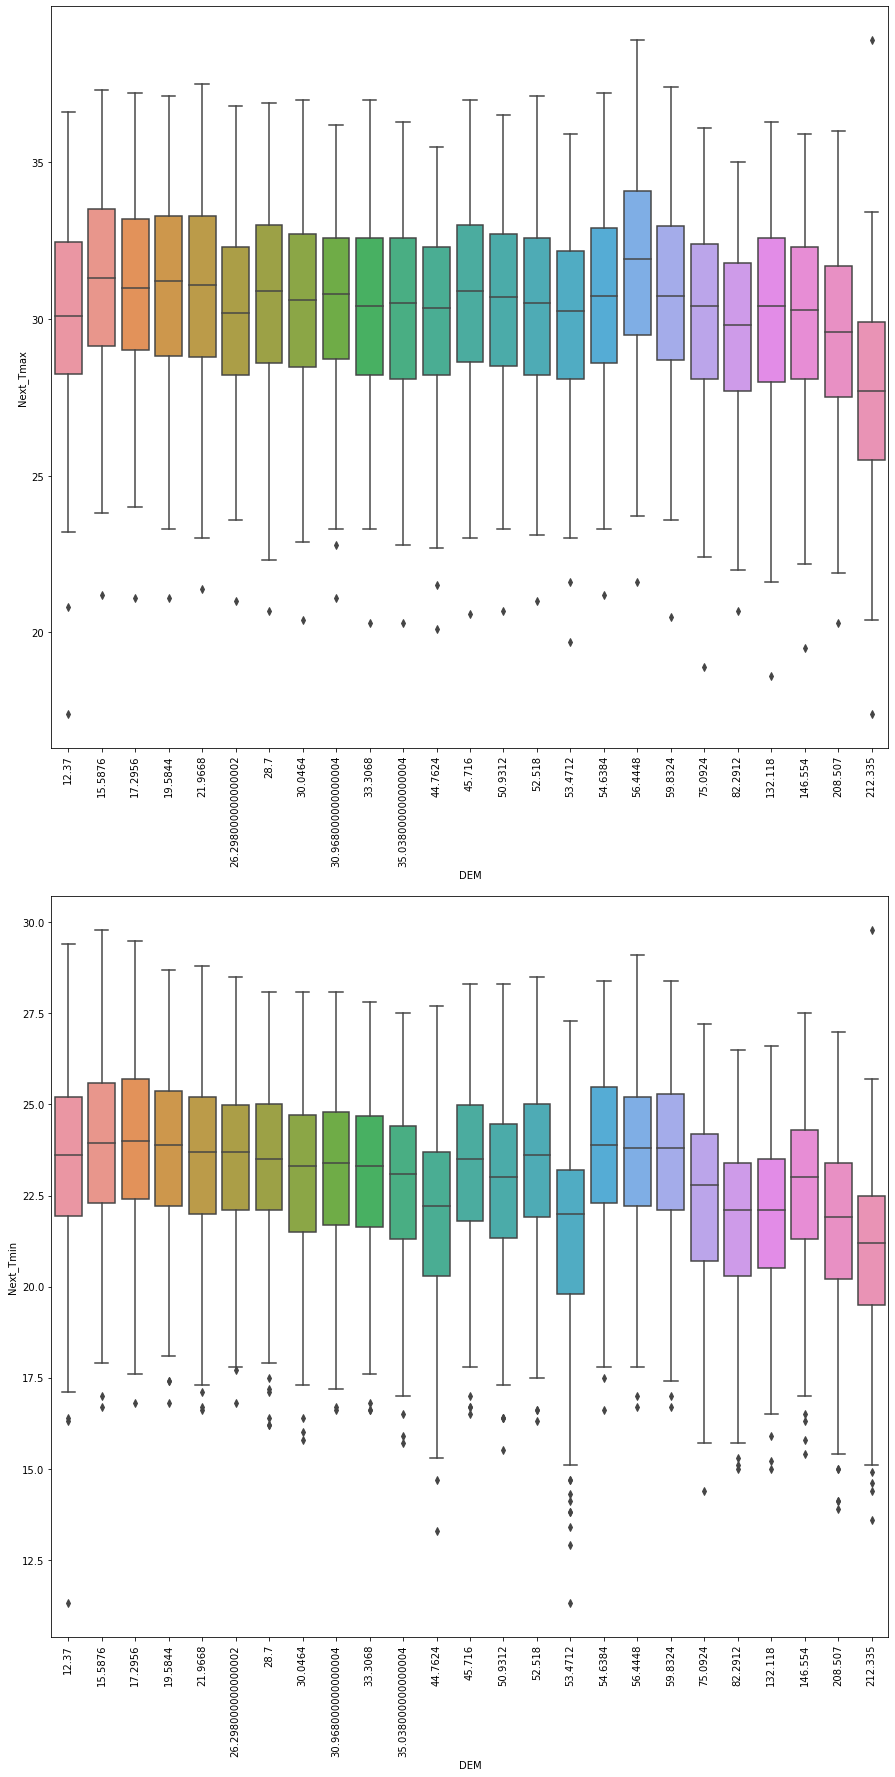

In [35]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='DEM',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='DEM',y='Next_Tmin',data=df)
plt.xticks(rotation=90)


Studies show that as the elevation increases, temperature decreases. This even true for our graph for the last 10 high elevations but not for all. It seems that temperature is also affected by other features rather than just elevation.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '0.09847460000000001'),
  Text(1, 0, '0.0985'),
  Text(2, 0, '0.1332'),
  Text(3, 0, '0.1457'),
  Text(4, 0, '0.1554'),
  Text(5, 0, '0.2223'),
  Text(6, 0, '0.2661'),
  Text(7, 0, '0.2713'),
  Text(8, 0, '0.4125'),
  Text(9, 0, '0.5055'),
  Text(10, 0, '0.5141'),
  Text(11, 0, '0.5721'),
  Text(12, 0, '0.5931'),
  Text(13, 0, '0.618'),
  Text(14, 0, '0.6233'),
  Text(15, 0, '0.6970000000000001'),
  Text(16, 0, '0.8552'),
  Text(17, 0, '1.2313'),
  Text(18, 0, '1.5629'),
  Text(19, 0, '1.7678'),
  Text(20, 0, '2.2579'),
  Text(21, 0, '2.5348'),
  Text(22, 0, '2.6865'),
  Text(23, 0, '2.785'),
  Text(24, 0, '4.7296'),
  Text(25, 0, '5.1782'),
  Text(26, 0, '5.17823')])

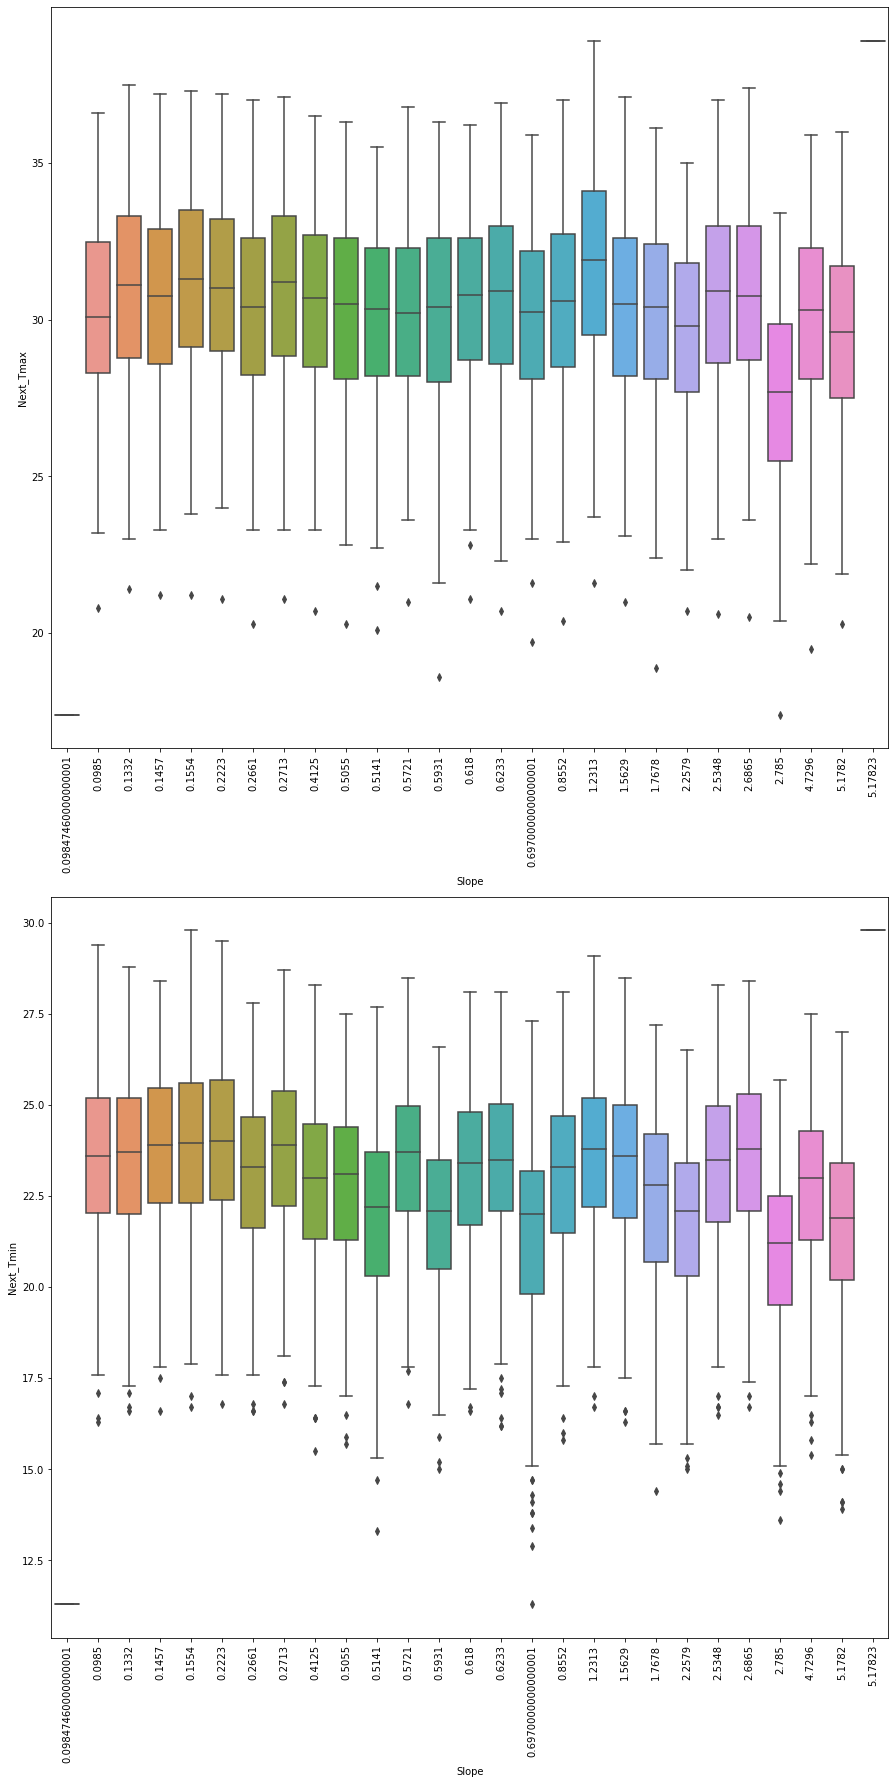

In [36]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='Slope',y='Next_Tmax',data=df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='Slope',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

A steep slope experiences a more rapid change in temperature than a gentle one thats why as rhe slopes increases the range of temperature also increases. Lowest and Highest temperatures are observed at consecutive slopes 0.697 and 0.8552 respectively

<AxesSubplot:title={'center':'Next day min Temperature Vs Present day min Temperature'}, xlabel='Present_Tmin', ylabel='Next_Tmin'>

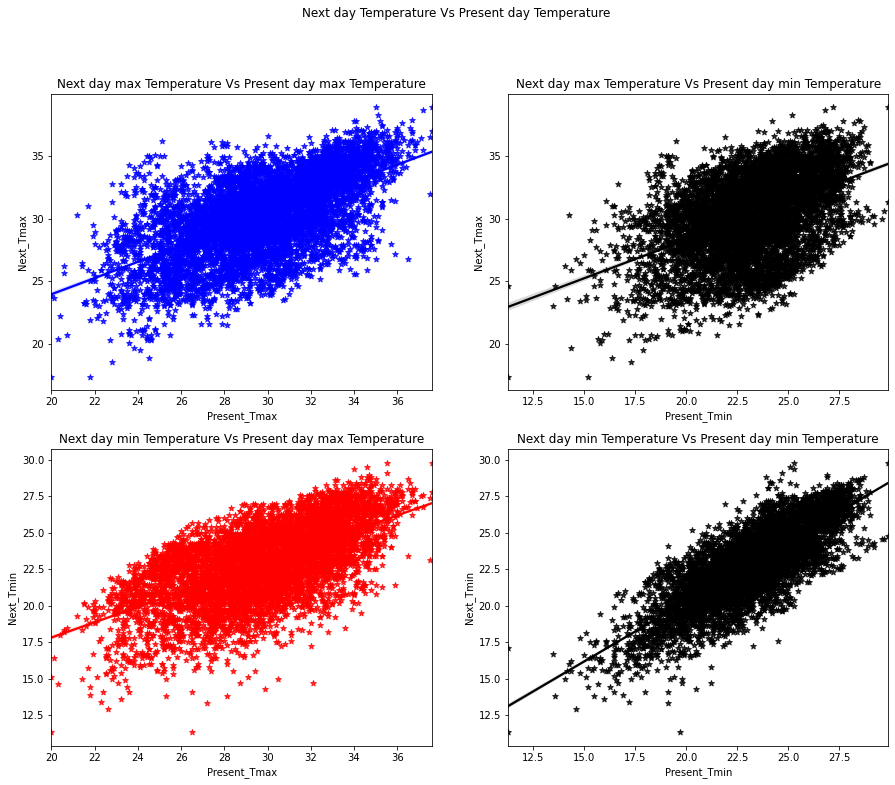

In [38]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperature Vs Present day Temperature')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=df,marker='*',color='b')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmin',data=df,marker='*',color='r')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df,marker='*',color='k')

There is high positive correlation of Next day temperatures with the present day temperatures.

<AxesSubplot:title={'center':'Next day min Temperatures Vs Present day min Relative Humidity'}, xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

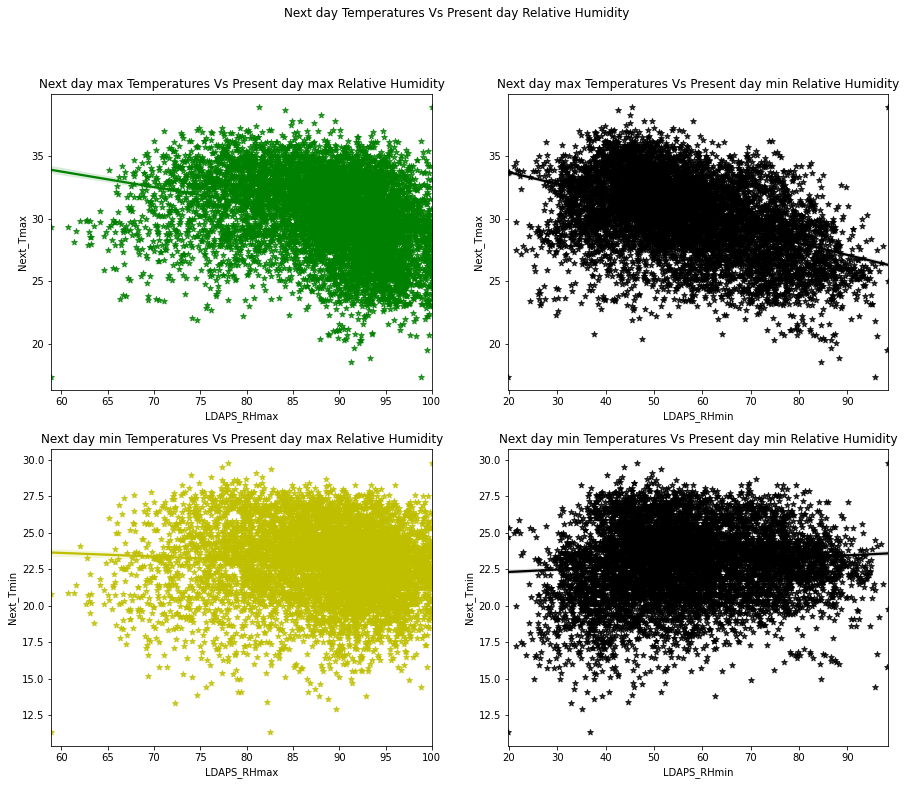

In [40]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperatures Vs Present day Relative Humidity')

plt.subplot(2,2,1)
plt.title('Next day max Temperatures Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmax',data=df,marker='*',color='g')

plt.subplot(2,2,2)
plt.title('Next day max Temperatures Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperatures Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmin',data=df,marker='*',color='y')

plt.subplot(2,2,4)
plt.title('Next day min Temperatures Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmin',data=df,marker='*',color='k')

Next day Tmax decreases with increase in RHmax and RHmin while this is not true for Tmin as Tmin seem to be unaffected by Rhmax and shows a slight positive correlation with Rhmin.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

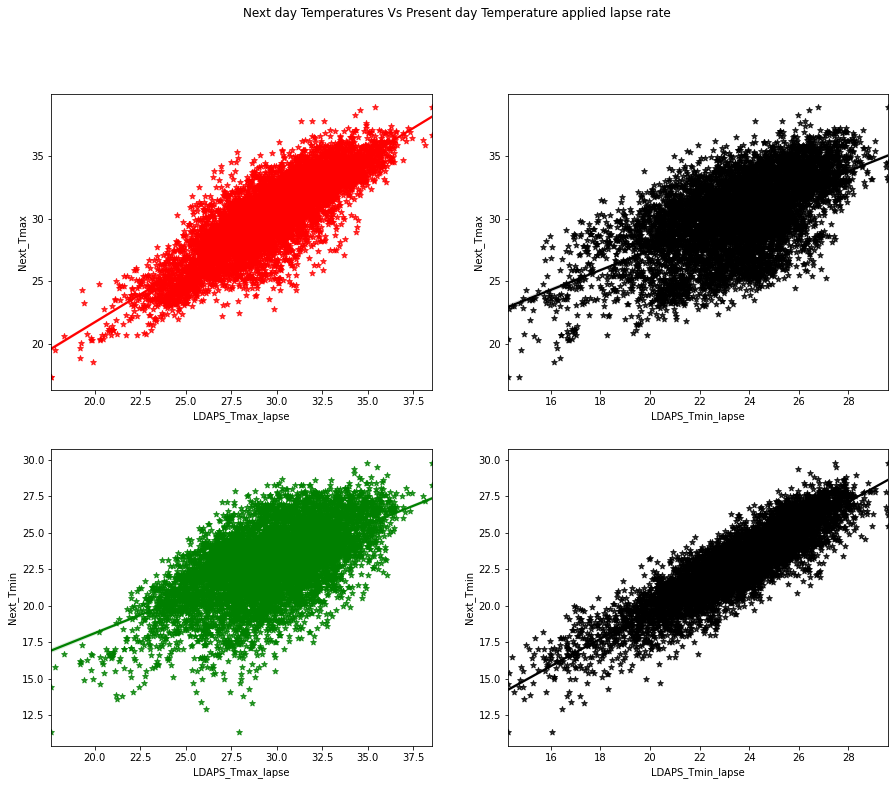

In [43]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperatures Vs Present day Temperature applied lapse rate')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df,marker='*',color='g')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df,marker='*',color='k')

There is high positive correlation of Next day temperatures with the present day temperatures applied lapse rate. If one increases other also increases.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmin'>

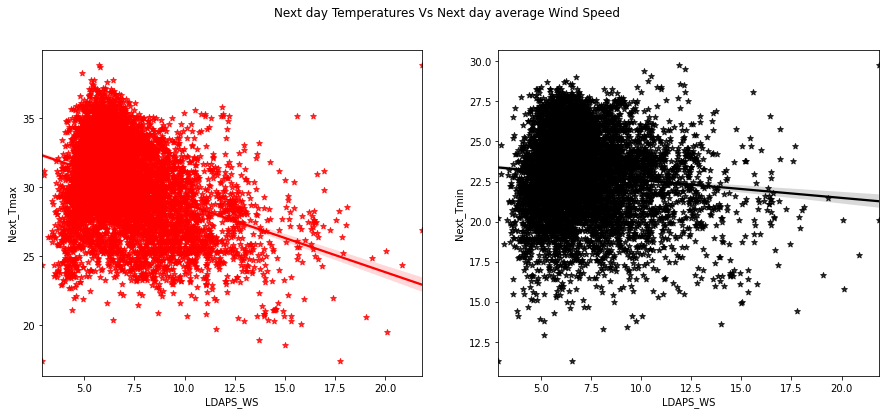

In [44]:
plt.figure(figsize=(15,6))
plt.suptitle('Next day Temperatures Vs Next day average Wind Speed')

plt.subplot(1,2,1)
sns.regplot(x='LDAPS_WS',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(1,2,2)
sns.regplot(x='LDAPS_WS',y='Next_Tmin',data=df,marker='*',color='k')

Temperarue decreases as the wind speed increases. Tmax seem to decrease more drastically than Tmin

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

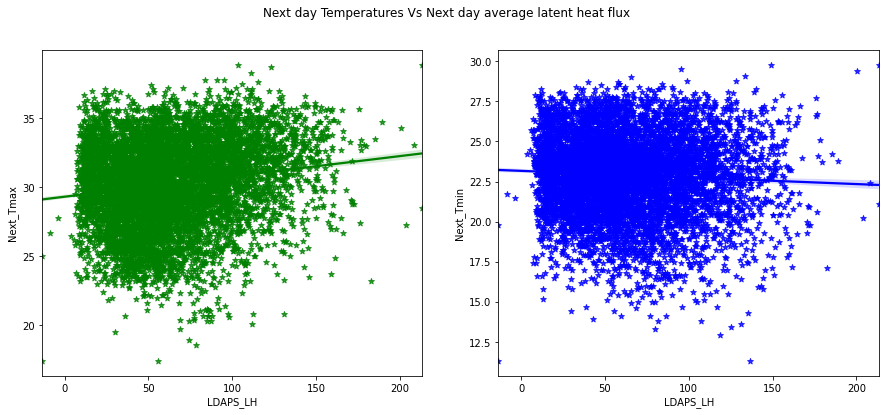

In [45]:
plt.figure(figsize=(15,6))
plt.suptitle('Next day Temperatures Vs Next day average latent heat flux')

plt.subplot(1,2,1)
sns.regplot(x='LDAPS_LH',y='Next_Tmax',data=df,marker='*',color='g')

plt.subplot(1,2,2)
sns.regplot(x='LDAPS_LH',y='Next_Tmin',data=df,marker='*',color='b')

As Latent heat flux increases Tmax also increases while Tmin decreases. Latent heat flux seem to bring out extremes of temperature with its increase.

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

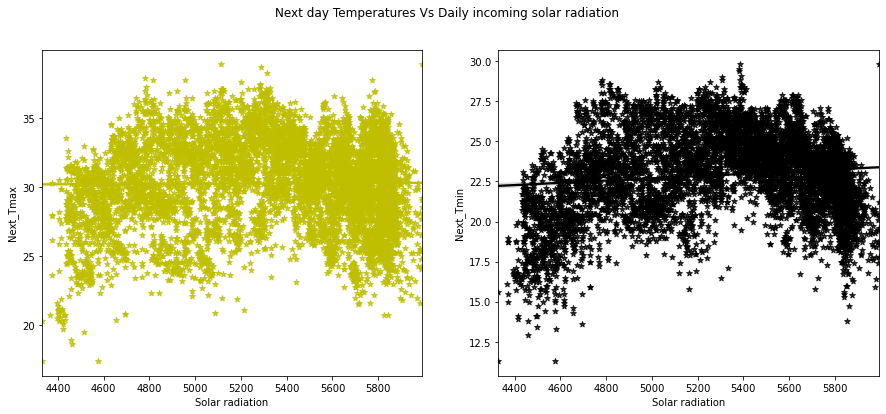

In [46]:
plt.figure(figsize=(15,6))
plt.suptitle('Next day Temperatures Vs Daily incoming solar radiation')

plt.subplot(1,2,1)
sns.regplot(x='Solar radiation',y='Next_Tmax',data=df,marker='*',color='y')

plt.subplot(1,2,2)
sns.regplot(x='Solar radiation',y='Next_Tmin',data=df,marker='*',color='k')

Solar radiation does not seem to affect Tmax or Tmin even though studies have shown that Air temperatures have their origin in the absorption of radiant energy from the Sun.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

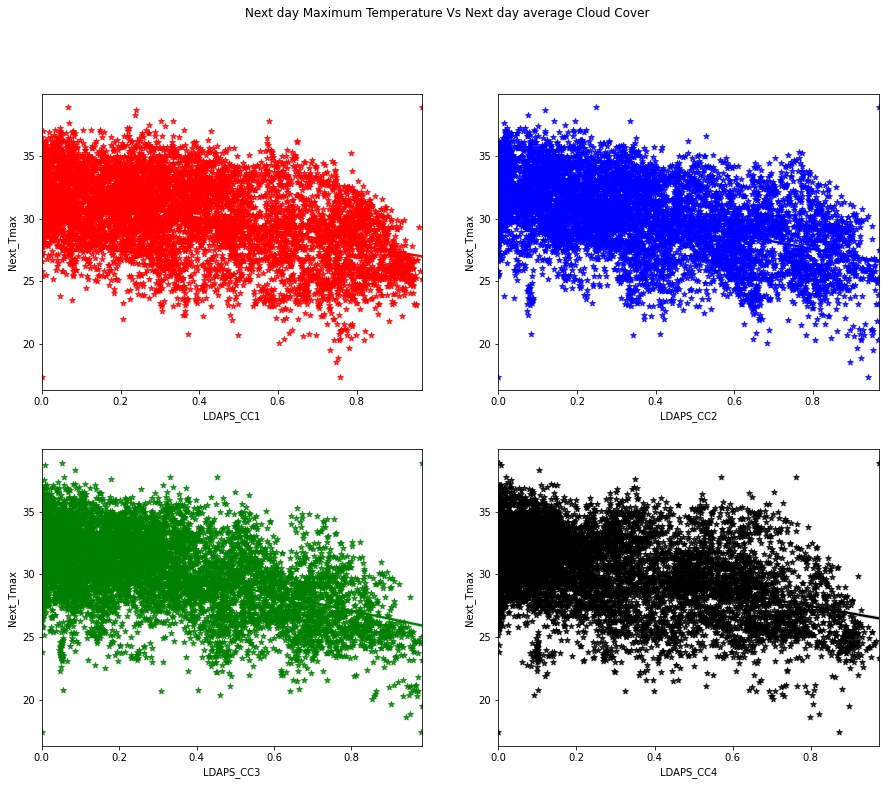

In [47]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Maximum Temperature Vs Next day average Cloud Cover')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_CC1',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_CC2',y='Next_Tmax',data=df,marker='*',color='b')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_CC3',y='Next_Tmax',data=df,marker='*',color='g')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_CC4',y='Next_Tmax',data=df,marker='*',color='k')

Tmax decreases as the cloud cover increases irrespective of any split which is also what studies show.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

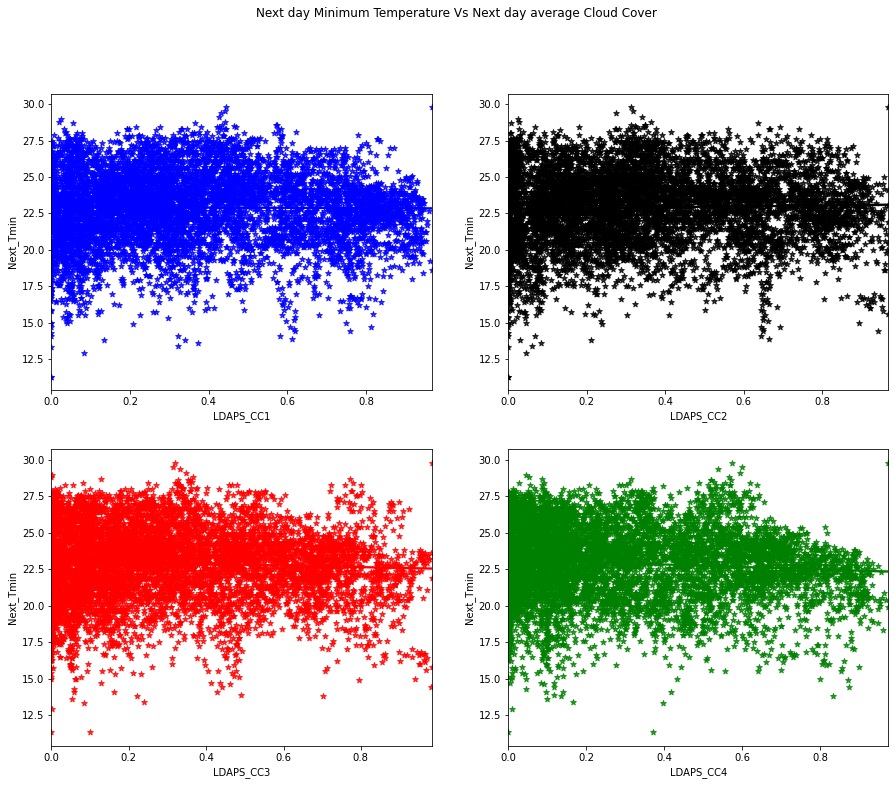

In [48]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Minimum Temperature Vs Next day average Cloud Cover')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_CC1',y='Next_Tmin',data=df,marker='*',color='b')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_CC2',y='Next_Tmin',data=df,marker='*',color='k')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_CC3',y='Next_Tmin',data=df,marker='*',color='r')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_CC4',y='Next_Tmin',data=df,marker='*',color='g')

Tmin seems to remain unaffeact by cloud cover as cloud cover is also responsible for green house effect which increases the temperature.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

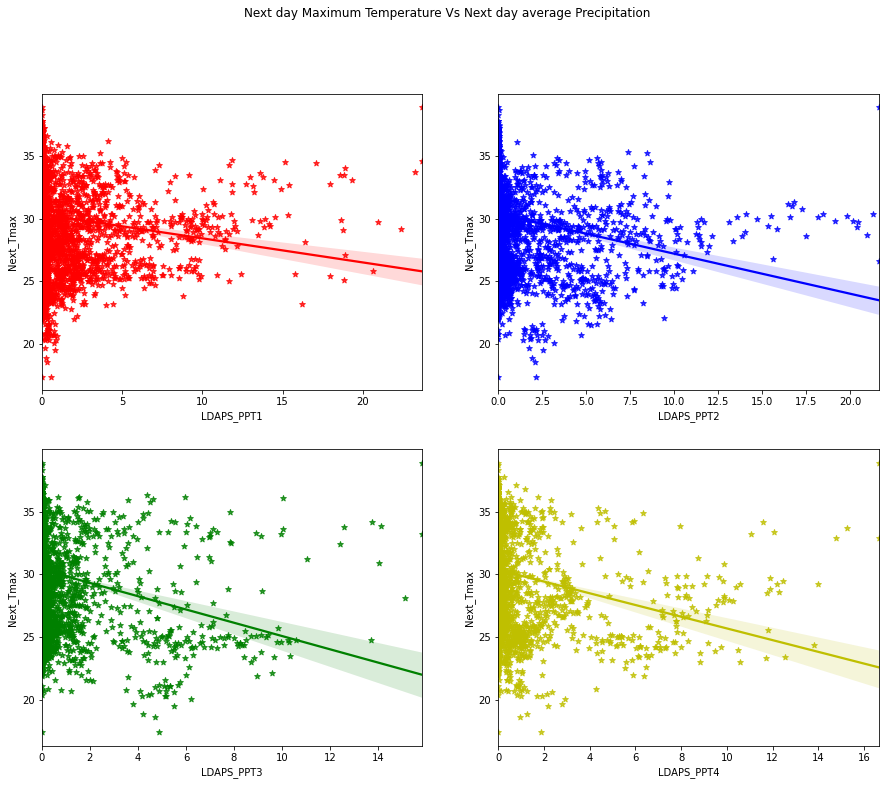

In [49]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Maximum Temperature Vs Next day average Precipitation')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_PPT1',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_PPT2',y='Next_Tmax',data=df,marker='*',color='b')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_PPT3',y='Next_Tmax',data=df,marker='*',color='g')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_PPT4',y='Next_Tmax',data=df,marker='*',color='y')

Tmax decreases as the precipitation increases irrespective of any split which is also what studies show

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

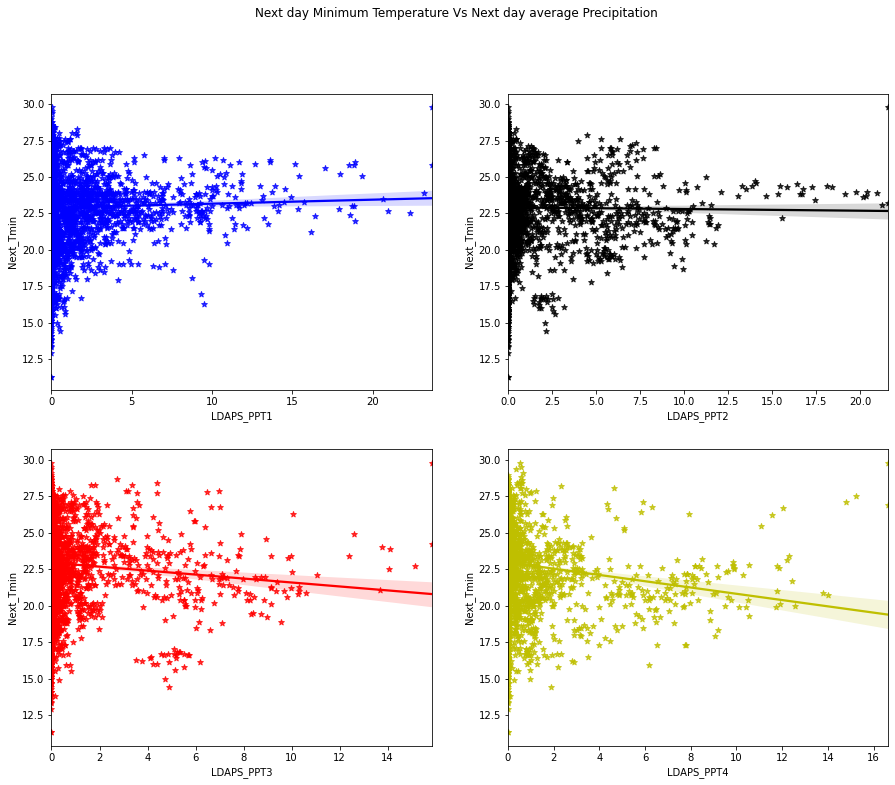

In [50]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Minimum Temperature Vs Next day average Precipitation')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_PPT1',y='Next_Tmin',data=df,marker='*',color='b')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_PPT2',y='Next_Tmin',data=df,marker='*',color='k')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_PPT3',y='Next_Tmin',data=df,marker='*',color='r')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_PPT4',y='Next_Tmin',data=df,marker='*',color='y')

There is very slight hange on increase of precipitation in Tmin. Tmin seem to decrease slightly as the precipitaion increases with later splits.

### Multivariate Analysis

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

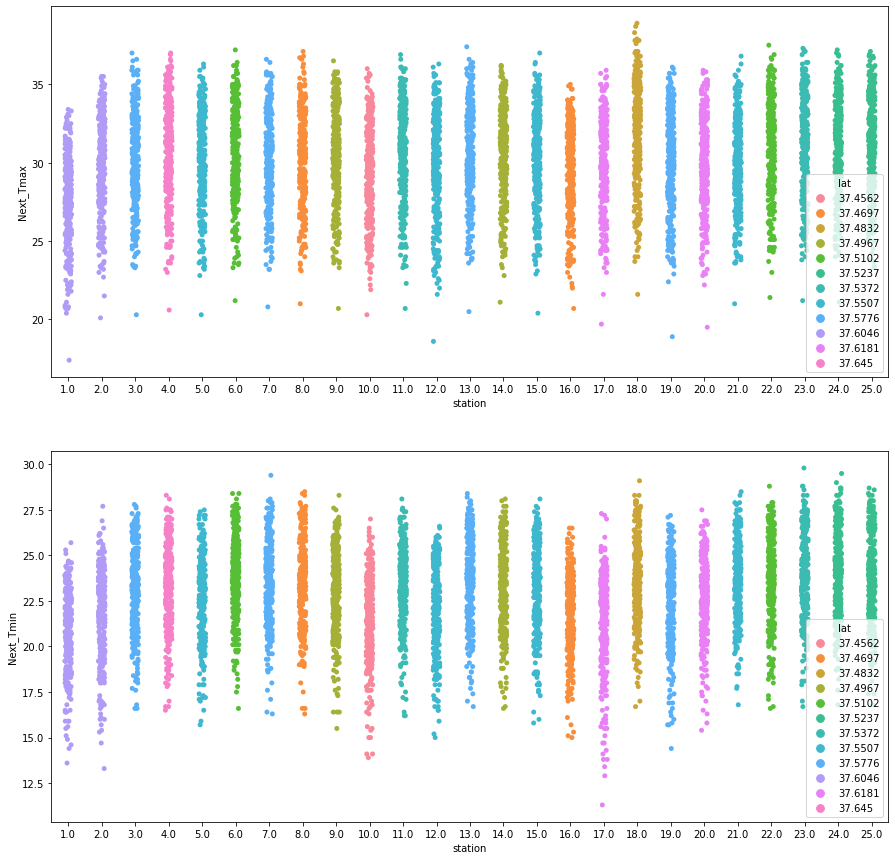

In [51]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='lat',data=df)

plt.subplot(2,1,2)
sns.stripplot(x='station',y='Next_Tmin',hue='lat',data=df)

Each station is located on a particular lalitude, There are atmost 3 staions on a single latitude, and as the latitude decreases, temperature seem to increase.

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

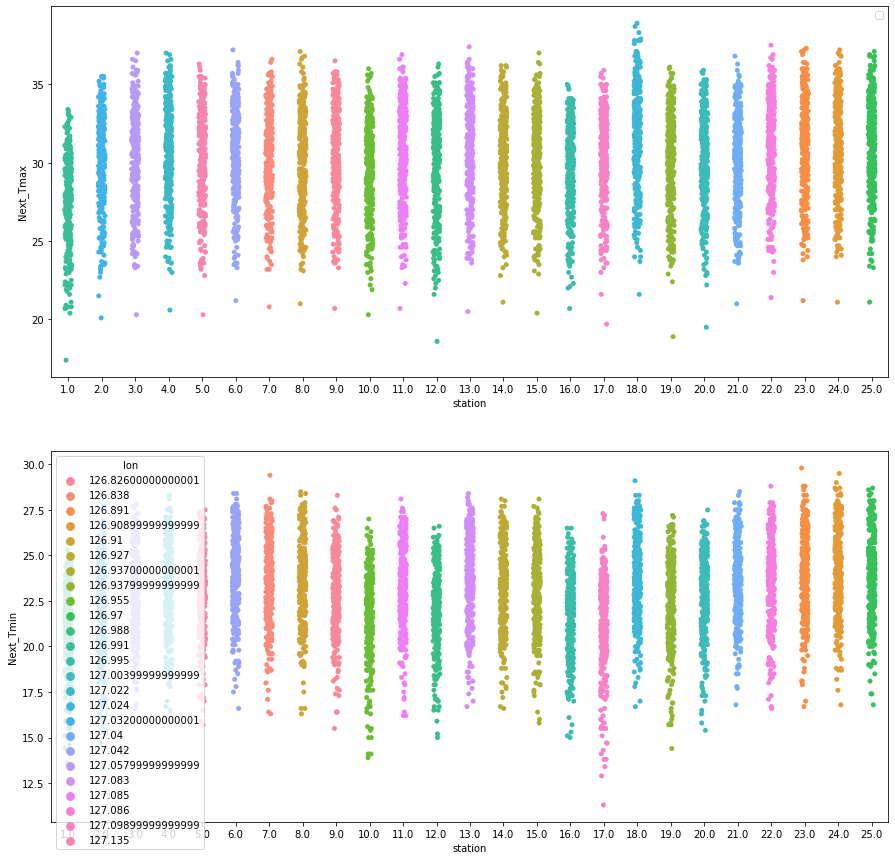

In [52]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='lon',data=df)
plt.legend('')

plt.subplot(2,1,2)
sns.stripplot(x='station',y='Next_Tmin',hue='lon',data=df)

Each station belong to a particular longitude. There is only one statiton belonging to a longitude. As the longitude do not affect the temperatures much the graphs are similar to the station vs latitudes.

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

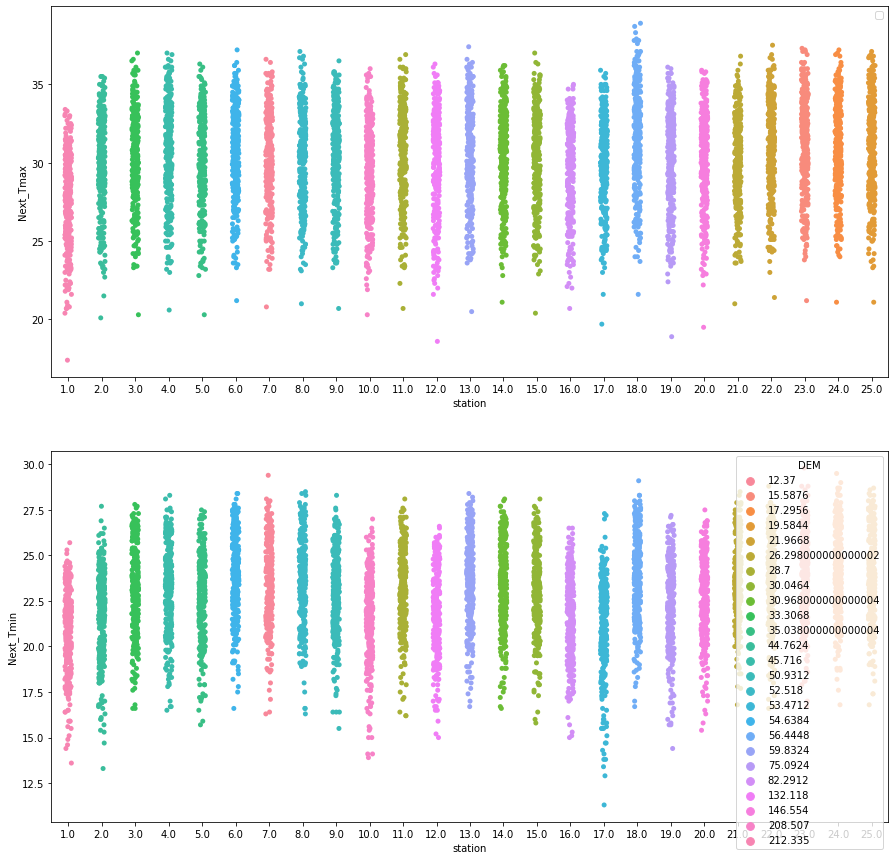

In [53]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='DEM',data=df)
plt.legend('')

plt.subplot(2,1,2)
sns.stripplot(x='station',y='Next_Tmin',hue='DEM',data=df)

Each station belong to a particular elevation. There is only one statiton belonging to a particular elevation. Highest tmax is noted at station 18 which have an elevation 56.44 even though it is not the lowest elevation, which indicates that elevation alone does not decide the temperature.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='LDAPS_CC4'>

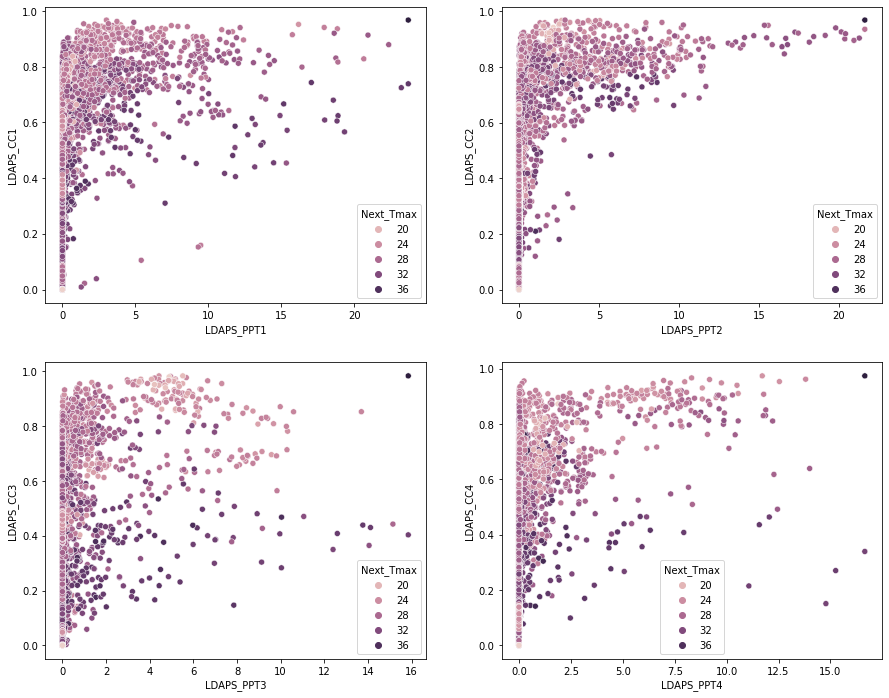

In [54]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_PPT1',y='LDAPS_CC1',hue='Next_Tmax',data=df)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_PPT2',y='LDAPS_CC2',hue='Next_Tmax',data=df)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_PPT3',y='LDAPS_CC3',hue='Next_Tmax',data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_PPT4',y='LDAPS_CC4',hue='Next_Tmax',data=df)

In the 1st split of cloud cover and precipitaion, precipitation increases after a value of cloud cover crosses 0.3 wjile this threshold increases to 0.5 in 2nd split after that decreases for all the splits. Tmax is higher when there cloud cover and precipitation both have lower value, while presence of outliers are also there.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='LDAPS_CC4'>

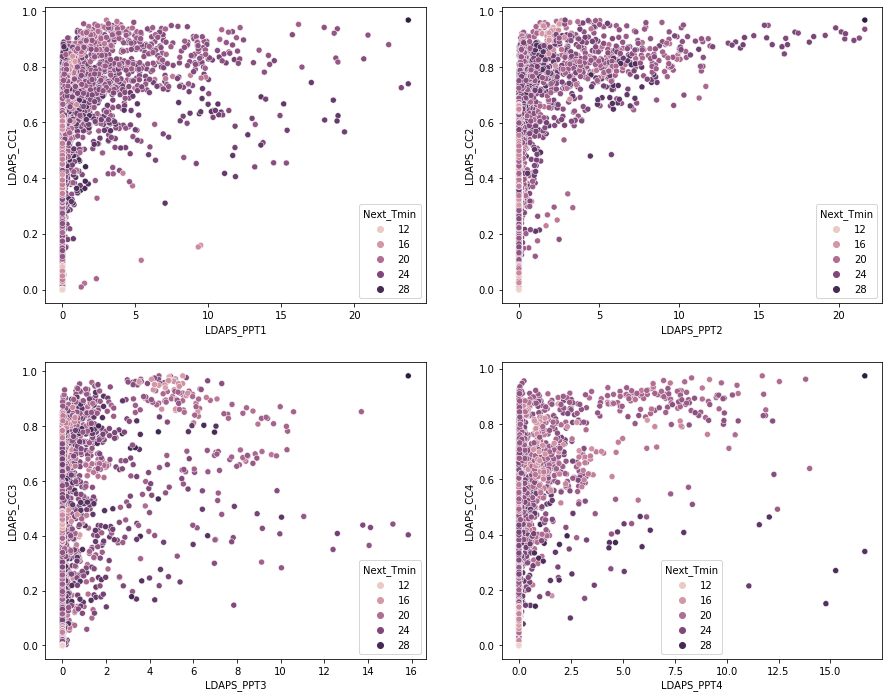

In [55]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_PPT1',y='LDAPS_CC1',hue='Next_Tmin',data=df)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_PPT2',y='LDAPS_CC2',hue='Next_Tmin',data=df)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_PPT3',y='LDAPS_CC3',hue='Next_Tmin',data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_PPT4',y='LDAPS_CC4',hue='Next_Tmin',data=df)

In the 1st split of cloud cover and precipitaion, precipitation increases after a value of cloud cover crosses 0.3 wjile this threshold increases to 0.5 in 2nd split after that decreases for all the splits. Tmin is higher when there cloud cover and precipitation both have lower value.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='LDAPS_Tmin_lapse'>

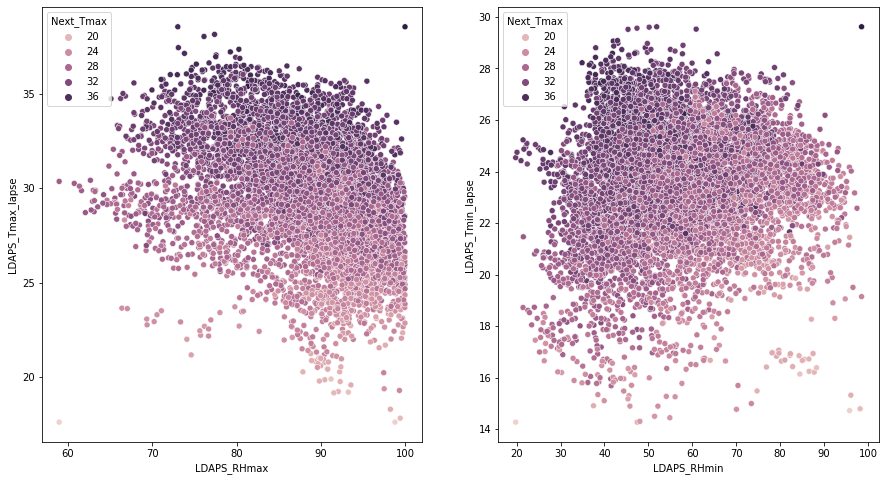

In [56]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x='LDAPS_RHmax',y='LDAPS_Tmax_lapse',hue='Next_Tmax',data=df)

plt.subplot(1,2,2)
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_Tmin_lapse',hue='Next_Tmax',data=df)

As RHmax increases, Tmax lapse rate decreases and Next day Tmax also seem to decrease while as Rhmin increases Tmin lapse rate also seem to increase but Next dat Tmax decreases

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='LDAPS_Tmin_lapse'>

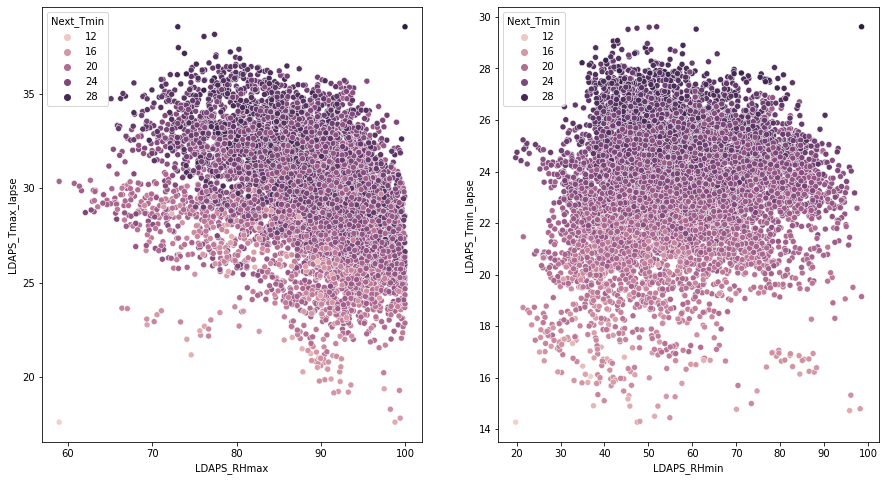

In [57]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x='LDAPS_RHmax',y='LDAPS_Tmax_lapse',hue='Next_Tmin',data=df)

plt.subplot(1,2,2)
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_Tmin_lapse',hue='Next_Tmin',data=df)

As RHmax increases, Tmax lapse rate decreases and Next day Tmin also seem to decrease while as Rhmin increases Tmin lapse rate also seem to increase but Next dat Tmin decreases

<AxesSubplot:>

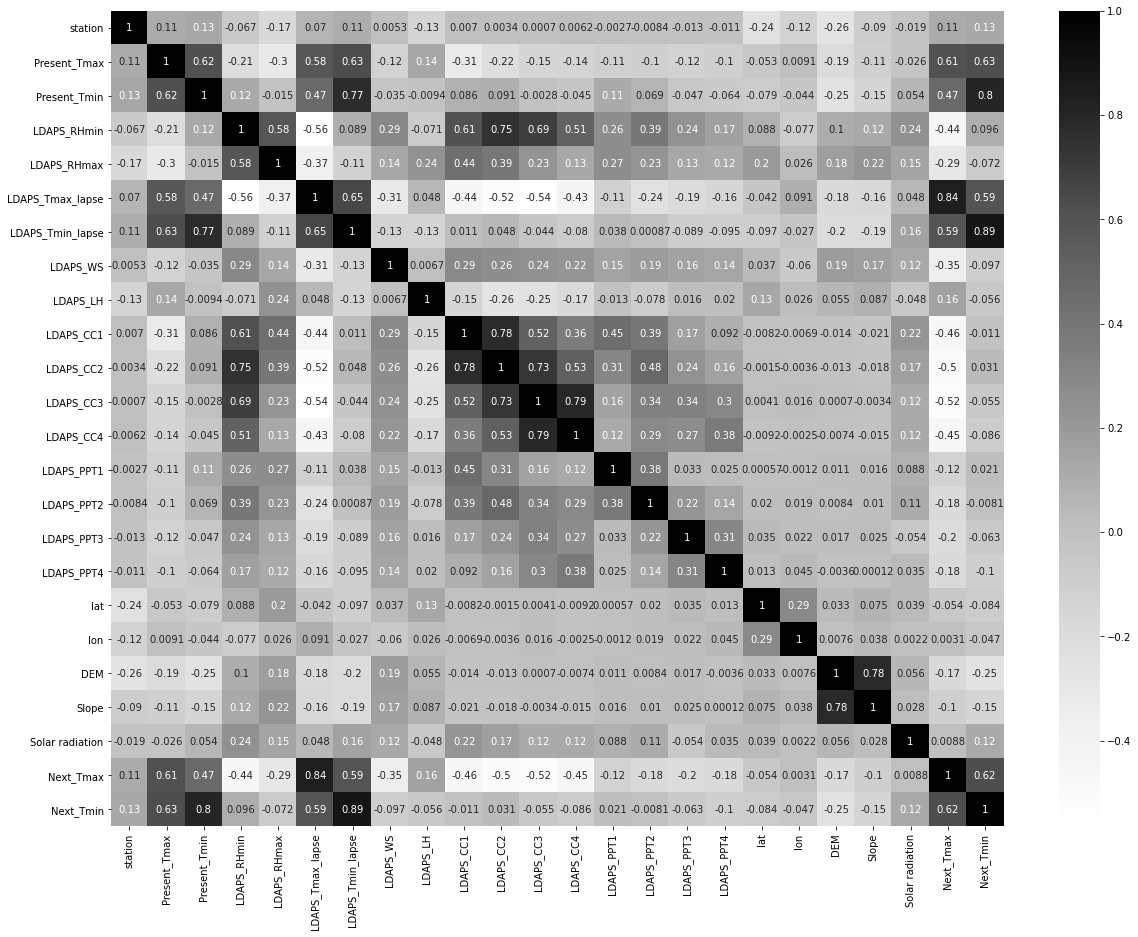

In [58]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

There is high correlation of Next day Tmax and Tmin with Present day Tmax and Tmin, Tmax applied lapse rate and Tmin applied lapse rate. There is also a high negative correlation of Tmax with cloud cover splits and relative minimum humidity. There is also high correlation between many independent features such as Present Day Tmax and Tmin, elevation ans slope etc. Multicollinearity need to be eliminated.

# Pre-Processing

#### Dropping Date Column

In [59]:
df.drop('Date',axis=1,inplace=True)

#### Rounding off the value of slope

In [60]:
df['Slope'].unique()

array([2.785    , 0.5141   , 0.2661   , 2.5348   , 0.5055   , 0.1457   ,
       0.0985   , 1.5629   , 0.4125   , 5.1782   , 0.6233   , 0.5931   ,
       2.6865   , 0.618    , 0.8552   , 2.2579   , 0.697    , 1.2313   ,
       1.7678   , 4.7296   , 0.5721   , 0.1332   , 0.1554   , 0.2223   ,
       0.2713   , 0.0984746, 5.17823  ])

As seen in EDA process 0.0984746 need to be rounded as 0.0985 and 5.17823 need to be rounded as 5.1782

In [63]:
df['Slope'].replace({0.09847460000000001:0.0985,5.17823:5.1782,0.6970000000000001:0.6970},inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0.0985'),
  Text(1, 0, '0.1332'),
  Text(2, 0, '0.1457'),
  Text(3, 0, '0.1554'),
  Text(4, 0, '0.2223'),
  Text(5, 0, '0.2661'),
  Text(6, 0, '0.2713'),
  Text(7, 0, '0.4125'),
  Text(8, 0, '0.5055'),
  Text(9, 0, '0.5141'),
  Text(10, 0, '0.5721'),
  Text(11, 0, '0.5931'),
  Text(12, 0, '0.618'),
  Text(13, 0, '0.6233'),
  Text(14, 0, '0.697'),
  Text(15, 0, '0.8552'),
  Text(16, 0, '1.2313'),
  Text(17, 0, '1.5629'),
  Text(18, 0, '1.7678'),
  Text(19, 0, '2.2579'),
  Text(20, 0, '2.5348'),
  Text(21, 0, '2.6865'),
  Text(22, 0, '2.785'),
  Text(23, 0, '4.7296'),
  Text(24, 0, '5.1782')])

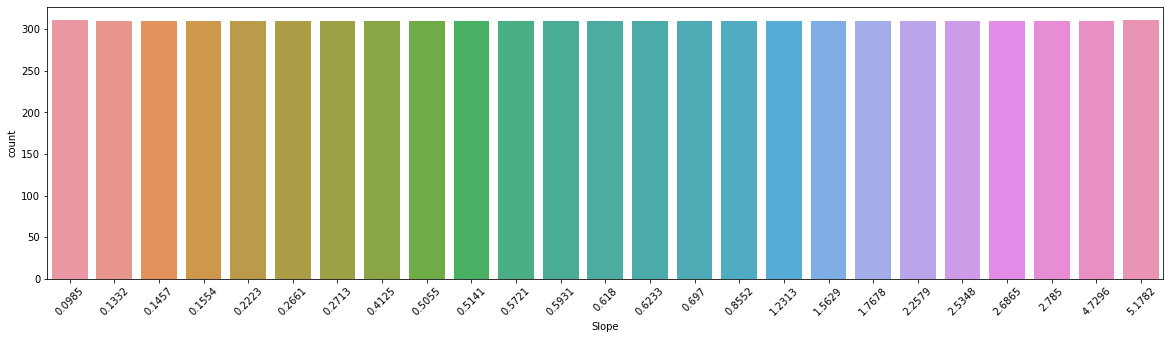

In [64]:
plt.figure(figsize=(20,5))
sns.countplot(df['Slope'])
plt.xticks(rotation=45)

Now there are no ambiguous values

#### Imputing Null values

In [65]:
from scipy.stats import mode

#### Next Tmax and Tmin columns

In [66]:
#We need to drop these rows as these are the label columns cannot impute null values to these 
df=df[df['Next_Tmax'].notnull()]

#### Station column

In [67]:
table=pd.pivot_table(values='station',index='Slope',data=df)
table.head()

station
Slope          
0.0985      7.0
0.1332     22.0
0.1457      6.0
0.1554     23.0
0.2223     24.0

Filling nan values of station from slope column as slope serves as an identifier column to station.

In [68]:
def sta(x):
    return table.loc[x['Slope'],'station']

df['station'].fillna(df[df['station'].isnull()].apply(sta,axis=1),inplace=True)

#### Deleting rows which have atleast 14 null values

In [69]:
df.dropna(subset=df.columns, thresh=14,inplace=True)

#### Present Tmax and Tmin

In [70]:
#We are dropping these null values as weel because upon evalution this gives better result than imputing these with mean values
df.dropna(inplace=True)

<AxesSubplot:>

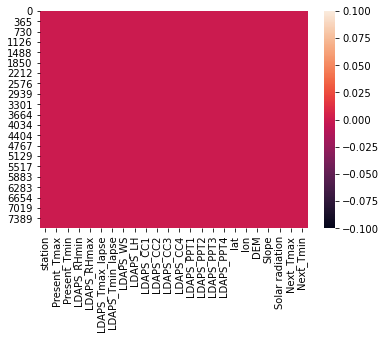

In [71]:
sns.heatmap(df.isnull())

No Null values remain

### Removing Outliers

In [72]:
#Using zscore method to remove outliers
from scipy.stats import zscore

In [73]:
#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [74]:
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 11.09%
With threshold 3.2 data loss is 9.51%
With threshold 3.4 data loss is 8.38%
With threshold 3.6 data loss is 7.56%
With threshold 3.8 data loss is 6.89%
With threshold 4.0 data loss is 6.25%
With threshold 4.2 data loss is 5.8%
With threshold 4.4 data loss is 5.19%
With threshold 4.6 data loss is 4.74%
With threshold 4.8 data loss is 4.37%


In [75]:
#We use threshold as 4.2 because data is expensive and upon evaluation of models this threhold turned out to be the best.
df=df[(z<4.2).all(axis=1)]

### Removing Skewness

In [76]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [77]:
for i in cont:
    if np.abs(df[i].skew())>=0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))


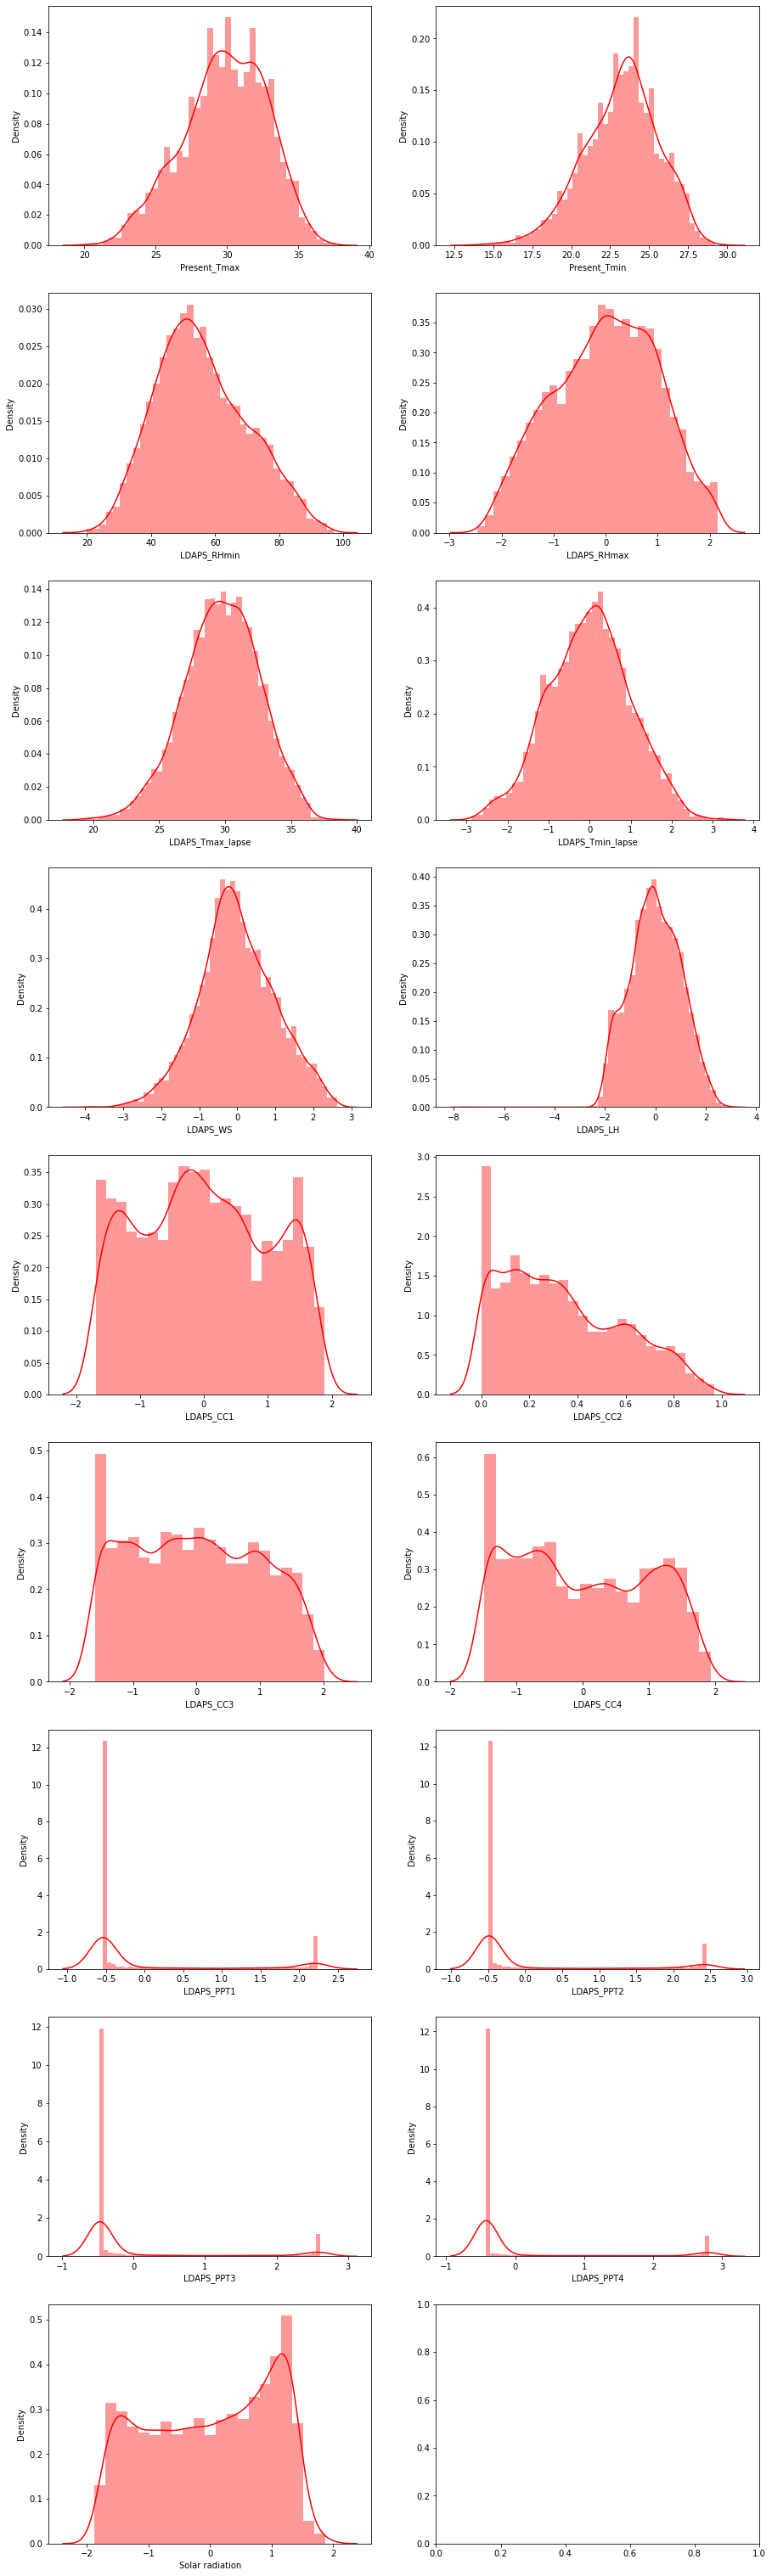

In [78]:
fig,ax=plt.subplots(9,2,figsize=(15,55))
r=0
c=0
for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],color='r',ax=ax[r,c])
    c+=1

Skewness is reduced considerably

In [79]:
#Separating dependent and independent features.
x=df.copy()
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
ymax=df['Next_Tmax']
ymin=df['Next_Tmin']

### Scaling the dataset

In [80]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [81]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Modelling Phase

In [82]:
from sklearn.model_selection import train_test_split,cross_val_score

In [83]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [84]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [85]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=10000000000000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [87]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']


In [88]:
def createmodels(model_list,x,y,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2)*100)
        mcv.append(np.round(np.mean(score),2)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross Validation Score']=mcv
    data.set_index('Model',inplace = True)
    return data        

In [89]:
createmodels(models,x,ymax,names)

Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     1.0486              1.9802   
SVR                                     0.8697              1.4167   
LinearRegression                        1.0466              1.9357   
Lasso                                   2.4591              9.0494   
Ridge                                   1.0470              1.9379   
DecisionTreeRegressor                   1.1183              2.4360   
RandomForestRegressor                   0.7300              0.9447   
AdaBoostRegressor                       1.1695              2.1360   
GradientBoostingRegressor               0.8873              1.3530   
XGBRegressor                            0.6716              0.7916   

                           Root Mean Squared Error      R2 Score  \
Model                                                              
KNeighborsRegressor                         1.4072  7.000000e+01   
SVR                                         1.1903  8.000000e+01   
LinearRegression                            1.3913  7.200000e+01   
Lasso                                       3.0082 -1.792426e+31   
Ridge                                       1.3921  7.200000e+01   
DecisionTreeRegressor                       1.5608  7.300000e+01   
RandomForestRegressor                       0.9719  8.700000e+01   
AdaBoostRegressor                           1.4615  6.100000e+01   
GradientBoostingRegressor                   1.1632  8.100000e+01   
XGBRegressor                                0.8897  9.000000e+01   

                           Mean of Cross Validation Score  
Model                                                      
KNeighborsRegressor                                  46.0  
SVR                                                  65.0  
LinearRegression                                     70.0  
Lasso                                                -7.0  
Ridge                                                70.0  
DecisionTreeRegressor                                45.0  
RandomForestRegressor                                68.0  
AdaBoostRegressor                                    66.0  
GradientBoostingRegressor                            70.0  
XGBRegressor                                         65.0

For pedicting Next day Maximum Temperature Random Forest, Xtreme Gradient Boost give the least error value while Ridge regressor is giving the highest mean of cross validation score along with Gradient Boosting Model.

In [90]:
createmodels(models,x,ymin,names)

Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     0.8176              1.1781   
SVR                                     0.6259              0.6434   
LinearRegression                        0.7751              0.9477   
Lasso                                   1.9866              6.1585   
Ridge                                   0.7752              0.9478   
DecisionTreeRegressor                   0.8625              1.3753   
RandomForestRegressor                   0.5763              0.5646   
AdaBoostRegressor                       0.8625              1.1351   
GradientBoostingRegressor               0.6446              0.6659   
XGBRegressor                            0.4880              0.4026   

                           Root Mean Squared Error      R2 Score  \
Model                                                              
KNeighborsRegressor                         1.0854  7.200000e+01   
SVR                                         0.8021  8.700000e+01   
LinearRegression                            0.9735  8.200000e+01   
Lasso                                       2.4816 -4.879260e+31   
Ridge                                       0.9736  8.100000e+01   
DecisionTreeRegressor                       1.1727  7.800000e+01   
RandomForestRegressor                       0.7514  8.900000e+01   
AdaBoostRegressor                           1.0654  7.600000e+01   
GradientBoostingRegressor                   0.8160  8.700000e+01   
XGBRegressor                                0.6345  9.300000e+01   

                           Mean of Cross Validation Score  
Model                                                      
KNeighborsRegressor                                  47.0  
SVR                                                  75.0  
LinearRegression                                     78.0  
Lasso                                               -14.0  
Ridge                                                78.0  
DecisionTreeRegressor                                57.0  
RandomForestRegressor                                78.0  
AdaBoostRegressor                                    75.0  
GradientBoostingRegressor                            80.0  
XGBRegressor                                         77.0

Same is the case while prediction Next day minimum temperature as Random Forest, Xtreme Gradient Boost give the least error value while Gradient Boost is giving the highest mean of cross validation score.

### Reducing Multicollinearity using Lasso

##### For Tmax

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymax)
print(m1.best_params_)

{'alpha': 0.001}


In [93]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymax)

Lasso(alpha=0.001)

In [94]:
importance = np.abs(m1.coef_)

In [95]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

Features  Coefficients
0            station      0.414667
1       Present_Tmax      2.892366
2       Present_Tmin      0.439141
3        LDAPS_RHmin      1.867211
4        LDAPS_RHmax      0.033401
5   LDAPS_Tmax_lapse     12.237564
6   LDAPS_Tmin_lapse      1.275452
7           LDAPS_WS      1.797137
8           LDAPS_LH      2.668634
9          LDAPS_CC1      0.298872
10         LDAPS_CC2      0.617885
11         LDAPS_CC3      0.515565
12         LDAPS_CC4      1.265517
13        LDAPS_PPT1      0.512172
14        LDAPS_PPT2      0.230607
15        LDAPS_PPT3      0.142552
16        LDAPS_PPT4      0.203693
17               lat      0.111839
18               lon      0.501058
19               DEM      0.732655
20             Slope      0.766948
21   Solar radiation      0.220732

None of the features coefficients have been reduced to zero.

##### For Tmin

In [96]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymin)
print(m1.best_params_)

{'alpha': 0.001}


In [97]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymin)

Lasso(alpha=0.001)

In [98]:
importance = np.abs(m1.coef_)

In [99]:
dfcolumns = pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores

Features  Coefficients
0            station      0.000000
1       Present_Tmax      0.946818
2       Present_Tmin      3.799765
3        LDAPS_RHmin      1.725961
4        LDAPS_RHmax      0.567889
5   LDAPS_Tmax_lapse      2.436989
6   LDAPS_Tmin_lapse      8.335946
7           LDAPS_WS      0.608111
8           LDAPS_LH      0.228965
9          LDAPS_CC1      0.000000
10         LDAPS_CC2      0.383626
11         LDAPS_CC3      0.017080
12         LDAPS_CC4      0.057504
13        LDAPS_PPT1      0.278733
14        LDAPS_PPT2      0.458225
15        LDAPS_PPT3      0.126994
16        LDAPS_PPT4      0.306195
17               lat      0.162643
18               lon      0.172734
19               DEM      1.463062
20             Slope      1.039085
21   Solar radiation      0.090083

Station column's coefficient has been reduced to zero, so we drop this feature and then check the performances of our model.

In [100]:
xlasso=x.drop('station',axis=1)

In [101]:
createmodels(models,xlasso,ymin,names)

Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     0.7216              0.9345   
SVR                                     0.6172              0.6219   
LinearRegression                        0.7749              0.9475   
Lasso                                   1.9866              6.1585   
Ridge                                   0.7751              0.9476   
DecisionTreeRegressor                   0.8384              1.2971   
RandomForestRegressor                   0.5758              0.5627   
AdaBoostRegressor                       0.8689              1.1391   
GradientBoostingRegressor               0.6433              0.6566   
XGBRegressor                            0.4944              0.4143   

                           Root Mean Squared Error      R2 Score  \
Model                                                              
KNeighborsRegressor                         0.9667  7.900000e+01   
SVR                                         0.7886  8.800000e+01   
LinearRegression                            0.9734  8.200000e+01   
Lasso                                       2.4816 -4.879260e+31   
Ridge                                       0.9735  8.100000e+01   
DecisionTreeRegressor                       1.1389  7.900000e+01   
RandomForestRegressor                       0.7501  8.900000e+01   
AdaBoostRegressor                           1.0673  7.500000e+01   
GradientBoostingRegressor                   0.8103  8.700000e+01   
XGBRegressor                                0.6437  9.300000e+01   

                           Mean of Cross Validation Score  
Model                                                      
KNeighborsRegressor                                  46.0  
SVR                                                  75.0  
LinearRegression                                     78.0  
Lasso                                               -14.0  
Ridge                                                78.0  
DecisionTreeRegressor                                55.0  
RandomForestRegressor                                78.0  
AdaBoostRegressor                                    74.0  
GradientBoostingRegressor                            80.0  
XGBRegressor                                         78.0

Performances of models have increased, Errors have been reduced and mean cross validation score of XGBRegressor has increased. So we keep this dataset for predicting Next day minumum Temperature.

## Hyperparameter Tuning

#### For Next day Maximum Temperature

In [102]:
xtrain_max,xtest_max,ytrain_max,ytest_max=train_test_split(x,ymax,test_size=0.25,random_state=randomstate(x,ymax))

### Ridge Regressor

In [103]:
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,200,
                     230, 250,265, 270, 275, 290, 300, 500,1000]}

g=GridSearchCV(Ridge(),params,cv=10)

g.fit(xtrain_max,ytrain_max)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   150, 200, 230, 250, 265, 270, 275, 290, 300,
                                   500, 1000]})

In [104]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

Ridge(alpha=0.1)
{'alpha': 0.1}
0.7637525257964427


In [105]:
m=Ridge(alpha=0.1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [106]:
score=cross_val_score(m,x,ymax,cv=10)

In [107]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 1.0466
Mean Squared Error is 1.9358
Root Mean Squared Error is 1.3913
R2 Score is 72.11999999999999
Mean of cross validaton Score is 66.4305


### Random Forest

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}

g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)

g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [110]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=4)
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': None}
0.8852156005203392


In [111]:
m=RandomForestRegressor(min_samples_leaf=3, min_samples_split=4)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)
score=cross_val_score(m,x,ymax,cv=10)

In [112]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.7445
Mean Squared Error is 0.9785
Root Mean Squared Error is 0.9892
R2 Score is 86.71
Mean of cross validaton Score is 64.6498


### Graidient Boost

In [113]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [114]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 1, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=7, n_estimators=400, subsample=1)
0.9185256152515837


In [115]:
m=GradientBoostingRegressor(max_depth=7, n_estimators=400, subsample=1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)
score=cross_val_score(m,x,ymax,cv=10)

In [116]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6319
Mean Squared Error is 0.7121
Root Mean Squared Error is 0.8439
R2 Score is 91.06
Mean of cross validaton Score is 63.89


### Extreme Gradient Boost

In [117]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30],
     "min_child_weight" : [ 1, 3, 5,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10,n_jobs=-2)

g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_la

In [118]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
{'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.5}
0.9179043417565163


In [119]:
m=XGBRegressor(colsample_bytree=0.5,gamma=0.2,learning_rate=0.1,max_depth=10, min_child_weight=5)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)
score=cross_val_score(m,x,ymax,cv=10)

In [120]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.6297
Mean Squared Error is 0.6933
Root Mean Squared Error is 0.8326
R2 Score is 91.13
Mean of cross validaton Score is 65.3644


## Conclusion

Extreme Gradient Boost is giving the best performance with least mean absolute error, mean squared error, root mean squared error and highest mean cross validation r2 score after ridge. So we choose this model as our final model.

#### For Next day Minimun Temperature

In [121]:
xtrain_min,xtest_min,ytrain_min,ytest_min=train_test_split(xlasso,ymin,test_size=0.25,random_state=randomstate(xlasso,ymin))

### Random Forest

In [122]:
params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15,20,25]}

g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-2)

g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [123]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': None}
RandomForestRegressor(min_samples_split=4)
0.8979586911124166


In [124]:
m=RandomForestRegressor(min_samples_split=4)
m.fit(xtrain_min,ytrain_min)
p=m.predict(xtest_min)
score=cross_val_score(m,xlasso,ymin,cv=10)

In [125]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.5762
Mean Squared Error is 0.5621
Root Mean Squared Error is 0.7497
R2 Score is 89.24
Mean of cross validaton Score is 74.2301


### Graidient Boost

In [126]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [127]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=8, n_estimators=500, subsample=0.5)
0.9306608978906074


In [128]:
m=GradientBoostingRegressor(max_depth=8, n_estimators=500, subsample=0.5)
m.fit(xtrain_min,ytrain_min)
p=m.predict(xtest_min)
score=cross_val_score(m,xlasso,ymin,cv=10)

In [129]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4671
Mean Squared Error is 0.3839
Root Mean Squared Error is 0.6196
R2 Score is 93.17999999999999
Mean of cross validaton Score is 74.8921


### Extreme Gradient Boost

In [130]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30],
     "min_child_weight" : [ 1, 3, 5,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

g.fit(xtrain_min,ytrain_min)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_la

In [131]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'min_child_weight': 10, 'max_depth': 25, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.5}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=25,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
0.9320546452317574


In [132]:
m=XGBRegressor(colsample_bytree=0.5,gamma=0.3,learning_rate=0.1,max_depth=25, min_child_weight=10)
m.fit(xtrain_min,ytrain_min)
p=m.predict(xtest_min)
score=cross_val_score(m,xlasso,ymin,cv=10)

In [133]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4701
Mean Squared Error is 0.3702
Root Mean Squared Error is 0.6085
R2 Score is 93.22
Mean of cross validaton Score is 74.4833


### Conclusion

Extreme Gradient Boost is giving the best performance with least mean absolute error and highest mean cross validation r2 score. So we choose this model as our final model.

# Finalizing the model

In [134]:
model_tmax=XGBRegressor(colsample_bytree=0.5,gamma=0.2,learning_rate=0.1,max_depth=10, min_child_weight=5)
model_tmax.fit(xtrain_max,ytrain_max)
p_tmax=model_tmax.predict(xtest_max)
score_tmax=cross_val_score(m,x,ymax,cv=10)

In [135]:
model_tmin=XGBRegressor(colsample_bytree=0.5,gamma=0.3,learning_rate=0.1,max_depth=25, min_child_weight=10)
model_tmin.fit(xtrain_min,ytrain_min)
p_tmin=model_tmin.predict(xtest_min)
score_tmin=cross_val_score(m,xlasso,ymin,cv=10)

## Evaluation Metrics

In [136]:
print('Evaluation Metrics for Next Day Maximum Temperature')
print('Mean Absolute Error is',np.round(mean_absolute_error(p_tmax,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p_tmax,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p_tmax,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p_tmax,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score_tmax)*100,4))

Evaluation Metrics for Next Day Maximum Temperature
Mean Absolute Error is 0.6297
Mean Squared Error is 0.6933
Root Mean Squared Error is 0.8326
R2 Score is 91.13
Mean of cross validaton Score is 65.1055


In [137]:
print('Evaluation Metrics for Next Day Minimum Temperature')
print('Mean Absolute Error is',np.round(mean_absolute_error(p_tmin,ytest_min),4))
print('Mean Squared Error is',np.round(mean_squared_error(p_tmin,ytest_min),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p_tmin,ytest_min)),4))
print('R2 Score is',np.round(r2_score(p_tmin,ytest_min),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score_tmin)*100,4))

Evaluation Metrics for Next Day Minimum Temperature
Mean Absolute Error is 0.4701
Mean Squared Error is 0.3702
Root Mean Squared Error is 0.6085
R2 Score is 93.22
Mean of cross validaton Score is 74.4833


Text(0.5, 1.0, 'Prediction of Minimum Temperature using Xtreme Gradient Regressor')

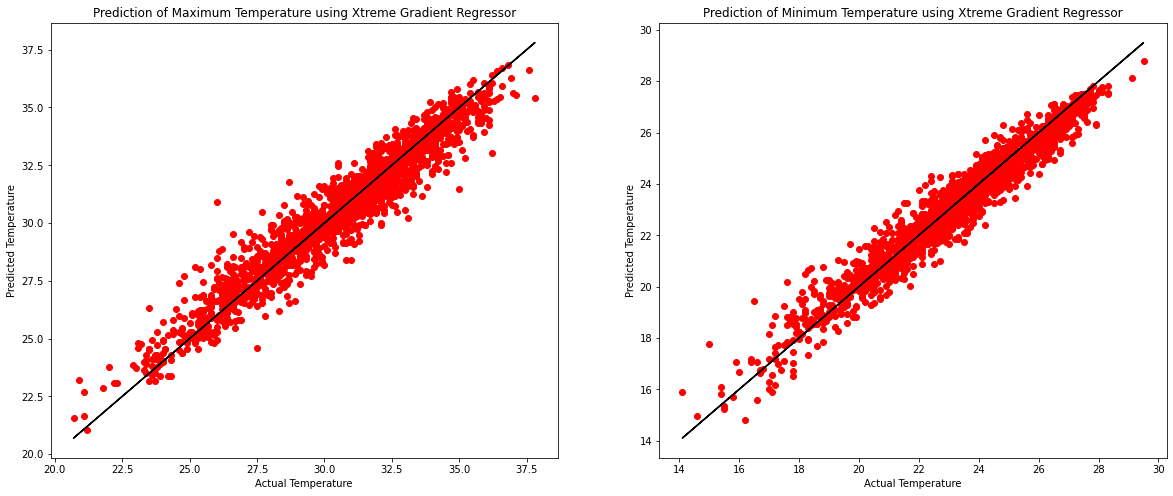

In [138]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(x=ytest_max,y=p_tmax,color='r')
plt.plot(ytest_max,ytest_max,color='k')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Prediction of Maximum Temperature using Xtreme Gradient Regressor')
plt.subplot(1,2,2)
plt.scatter(x=ytest_min,y=p_tmin,color='r')
plt.plot(ytest_min,ytest_min,color='k')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Prediction of Minimum Temperature using Xtreme Gradient Regressor')

### Concluding Remarks

There is high Bias in our model for this dataset as we are getting a very good R2 score but K-Fold cross validation score is quite low. Even though we have removed outliers and used ensemble techniques and reduced biasing to the minimum, still it remains.